In [1]:
print("Hello World")
from statannotations.Annotator import Annotator
from adjustText import adjust_text

Hello World


In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import anndata as ad
from collections import Counter
from scipy.stats import norm
import pickle
import gc 
gc.enable()

In [3]:
import gseapy
print(gseapy.__version__)
import PyComplexHeatmap as pch
print(pch.__version__)
from PyComplexHeatmap import *

1.1.3
1.7.4


In [4]:
sc.settings.verbosity = 1  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                 10.3.0
PyComplexHeatmap    1.7.4
adjustText          1.1.1
asttokens           NA
backcall            0.2.0
bottleneck          1.3.7
brotli              1.0.9
certifi             2025.04.26
charset_normalizer  3.3.2
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.2.0
executing           0.8.3
gseapy              1.1.3
h5py                3.11.0
idna                3.7
igraph              0.11.5
importlib_resources NA
ipykernel           6.28.0
jedi                0.18.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.7.5
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numexpr             2.8.7
numpy               1.26.4
packaging           24.0
palettable 

In [5]:
tms_adata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata_processed0.h5ad")
tms_adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cell_cl

In [6]:
freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')
freq_table["tissue_Sex"] = freq_table["tissue"].astype(str) + "_" + freq_table["Sex"].astype(str)
tissue_sex_filter = freq_table[freq_table["count"] > 1].tissue_Sex.values
tissue_sex_filter

/tmp/ipykernel_3362064/558152723.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')


array(['Bladder_F', 'Bladder_M', 'Blood_F', 'Blood_M', 'Bone_Marrow_F',
       'Bone_Marrow_M', 'Eye_F', 'Fat_F', 'Fat_M', 'Heart_F', 'Heart_M',
       'Large_Intestine_F', 'Large_Intestine_M', 'Liver_M', 'Lung_F',
       'Lung_M', 'Lymph_Node_F', 'Lymph_Node_M', 'Mammary_F', 'Muscle_F',
       'Muscle_M', 'Ovary_F', 'Pancreas_F', 'Prostate_M',
       'Salivary_Gland_F', 'Salivary_Gland_M', 'Skin_F', 'Skin_M',
       'Small_Intestine_F', 'Small_Intestine_M', 'Spleen_F', 'Spleen_M',
       'Stomach_F', 'Thymus_F', 'Thymus_M', 'Tongue_F', 'Tongue_M',
       'Trachea_F', 'Trachea_M', 'Uterus_F', 'Vasculature_F',
       'Vasculature_M'], dtype=object)

In [7]:
tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter))].obs["CDKN2A+ MKI67-"].value_counts()

CDKN2A+ MKI67-
Negative    1035955
Positive      48114
Name: count, dtype: int64

In [8]:
tms_adata.obs["Senescence status"] = tms_adata.obs["CDKN2A+ MKI67-"].cat.rename_categories({"Negative" : "Non-sen.", "Positive" : "Sen."})

In [171]:
temp = tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)), features]
temp

View of AnnData object with n_obs × n_vars = 1084069 × 8
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cel

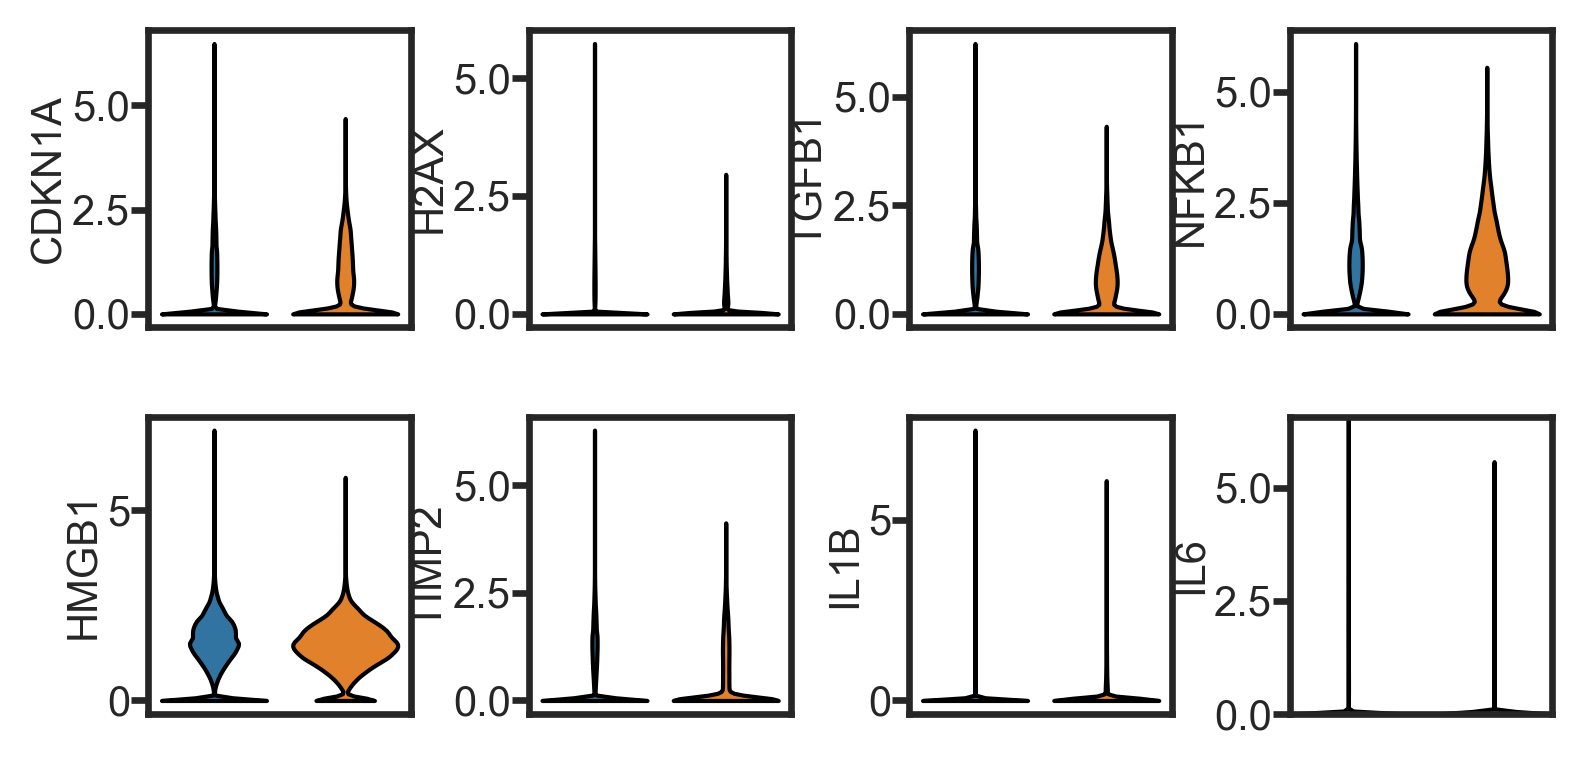

In [180]:
sc.settings.set_figure_params(dpi=300, dpi_save= 300, fontsize=5, facecolor='white', frameon=False, figsize=(0.8,0.8), transparent=True, format="pdf")
sns.set_style("ticks")
features = ["CDKN1A", "H2AX", "TGFB1", "NFKB1", "HMGB1", "TIMP2", "IL1B", "IL6"]
fig, axs = plt.subplots(2,4, figsize = (3.0,1.5))
axs = axs.flatten()
for i, feature in enumerate(features):
    sc.pl.violin(temp, keys=feature, groupby="Senescence status", stripplot=False, show=False, ax=axs[i], linewidth = 0.5, linecolor = "black")
    axs[i].set_title(axs[i].get_title(), pad=0)
    axs[i].grid(False)
    axs[i].tick_params(axis='both', which='major', pad=0.2, size = 2, labelsize = 5)
    axs[i].set_ylabel(feature, labelpad = 0.5)
    axs[i].xaxis.set_visible(False)
    # axs[i].set_xlabel("Senescence status", labelpad = 0.5)
    # annotator = Annotator(axs[i], [("Non-sen.", "Sen.")], data=tms_adata.obs, x="Senescence status", y=feature, order=["Non-sen.", "Sen."], plot='violinplot')
    # annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    # # annotator.new_plot(axs[i], )
    # annotator.apply_test().annotate()  
plt.margins(x=0, y=0)
plt.subplots_adjust(wspace=0.45, hspace=0.3)
plt.savefig("./human_figures/TS_senescence_markers_voilin.pdf")

In [14]:
def find_senescence_associated_genes(adata, 
                  variable_key,
                  variable_value,
                  groupby_variable,
                  group_selection = "Postive",
                  key_added = "rank_gene_groups",
                  method = "wilcoxon",
                  min_cell_count = 5,
                  only_positive = True,
                  min_log_fc = 0.0, 
                  pval_thresh = 0.001,
                  min_pct_nz_group = 0.0,
                  min_pct_nz_reference = 0.0,
                  min_pct_nz_difference = 0.0,
                  return_tuple_with_z = False,
                  return_tuple_with_lfc = False,
                  pts = True,
                  use_raw = False):
    
    adata_subset = adata[adata.obs[variable_key] == variable_value]
    print(f"{variable_key}: {variable_value}, Shape: {adata_subset.shape}")
    # print(adata_subset.obs[groupby_variable].value_counts())

    groupby_value_counts = adata_subset.obs[groupby_variable].value_counts()
    if len(groupby_value_counts) < 2 or groupby_value_counts.min() <= min_cell_count:
        return None

    sc.tl.rank_genes_groups(
        adata_subset,
        groupby=groupby_variable,
        key_added=f"{key_added}_{groupby_variable}",
        use_raw=use_raw,
        pts=pts,
        method=method
    )

    markers = sc.get.rank_genes_groups_df(
        adata_subset,
        key=f"{key_added}_{groupby_variable}",
        group=group_selection,
        pval_cutoff=pval_thresh
    )
    
    if only_positive == False:
        markers = markers[
            (markers.pvals_adj < pval_thresh) &
            (abs(markers.logfoldchanges) > min_log_fc) &
            (markers.pct_nz_group > min_pct_nz_group)
        ]
    else:
        markers = markers[
            (markers.pvals_adj < pval_thresh) &
            (markers.logfoldchanges > min_log_fc) &
            (markers.pct_nz_group > min_pct_nz_group)
        ]
    
    markers = markers.sort_values(by = "logfoldchanges", ascending=False)
    markers["pct_nz_difference"] = markers["pct_nz_group"] - markers["pct_nz_reference"]
    
    if min_pct_nz_difference > 0.0:
        markers = markers[
        ~((markers.pct_nz_reference < 0.01) &
        (markers.pct_nz_difference < min_pct_nz_difference))
        ]
    markers["z"] = markers["logfoldchanges"].apply(np.sign) * norm.isf(markers["pvals_adj"] / 2)

    if return_tuple_with_z:
        return list(zip(markers.names, markers.z))
    elif return_tuple_with_lfc:
        return list(zip(markers.names, markers.logfoldchanges))
    else: 
        return list(markers["names"].values)

def process_tabula_sapiens_adata_for_SAGs(
        adata_full,
        variable_key,
        groupby_variable="CDKN2A+ MKI67-",
        group_selection = "Positive",
        key_added="rank_gene_groups",
        method = "wilcoxon",
        pts = True,
        only_positive = True,
        min_log_fc = 0.0,
        pval_thresh = 0.001,
        min_pct_nz_group = 0.0,
        min_pct_nz_reference = 0.0,
        min_pct_nz_difference = 0.0,
        use_raw = False,
        return_tuple_with_z = False,
        return_tuple_with_lfc = False,
):
    
    marker_dict = {}
    counter = 0
    for variable in adata_full.obs[variable_key].cat.categories:
        markers = list()
        markers_subset = find_senescence_associated_genes(adata_full, 
                                variable_key = variable_key,
                                variable_value = variable,
                                groupby_variable = groupby_variable, 
                                group_selection = group_selection,
                                key_added = key_added,
                                min_log_fc = min_log_fc, 
                                pval_thresh = pval_thresh,
                                min_pct_nz_group = min_pct_nz_group,
                                min_pct_nz_reference = min_pct_nz_reference,
                                min_pct_nz_difference = min_pct_nz_difference,
                                return_tuple_with_z = return_tuple_with_z,
                                return_tuple_with_lfc = return_tuple_with_lfc,                          
                                use_raw = use_raw,
                                only_positive = only_positive,
                                pts = pts
                                )
        if markers_subset != None:
            markers.extend(markers_subset)
        
        if len(markers):
            marker_dict[variable] = markers
            counter += 1
    return marker_dict

In [ ]:
subset_variable_key = "donor_tissue_broadcelltype"  # Variable to loop over for performing DGEA
groupby_variable = "CDKN2A+ MKI67-"  # Variable for grouping senescent and non-senescent cells
key_added = "rank_gene_groups"  # Key added for storing DGEA results
marker_dict = process_tabula_sapiens_adata_for_SAGs(tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter))], 
                                variable_key = subset_variable_key, 
                                groupby_variable = groupby_variable, 
                                key_added = key_added,
                                min_log_fc = 0.5,
                                pval_thresh = 0.001,
                                min_pct_nz_group = 0.5,
                                only_positive=True,                  
                                return_tuple_with_lfc = True)

donor_tissue_broadcelltype: TSP10__Blood__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP10__Blood__erythroid lineage cell, Shape: (628, 61806)
donor_tissue_broadcelltype: TSP10__Blood__granulocyte, Shape: (237, 61806)
donor_tissue_broadcelltype: TSP10__Blood__hematopoietic cell, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP10__Blood__innate lymphoid cell, Shape: (285, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Blood__lymphocyte of b lineage, Shape: (940, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Blood__myeloid leukocyte, Shape: (1658, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Blood__stem cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP10__Blood__t cell, Shape: (571, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Fat__contractile cell, Shape: (668, 61806)
donor_tissue_broadcelltype: TSP10__Fat__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP10__Fat__endothelial cell, Shape: (2383, 61806)
donor_tissue_broadcelltype: TSP10__Fat__fibroblast, Shape: (6799, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Fat__granulocyte, Shape: (85, 61806)
donor_tissue_broadcelltype: TSP10__Fat__hematopoietic cell, Shape: (133, 61806)
donor_tissue_broadcelltype: TSP10__Fat__innate lymphoid cell, Shape: (328, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Fat__lymphocyte of b lineage, Shape: (105, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Fat__myeloid leukocyte, Shape: (2312, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Fat__stem cell, Shape: (61, 61806)
donor_tissue_broadcelltype: TSP10__Fat__t cell, Shape: (1563, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Skin__contractile cell, Shape: (140, 61806)
donor_tissue_broadcelltype: TSP10__Skin__dendritic cell, Shape: (41, 61806)
donor_tissue_broadcelltype: TSP10__Skin__endothelial cell, Shape: (842, 61806)
donor_tissue_broadcelltype: TSP10__Skin__fibroblast, Shape: (1636, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Skin__granulocyte, Shape: (714, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Skin__innate lymphoid cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP10__Skin__lymphocyte of b lineage, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP10__Skin__melanocyte, Shape: (63, 61806)
donor_tissue_broadcelltype: TSP10__Skin__myeloid leukocyte, Shape: (926, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP10__Skin__secretory cell, Shape: (68, 61806)
donor_tissue_broadcelltype: TSP10__Skin__stromal cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP10__Skin__t cell, Shape: (1860, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP11__Bone_Marrow__dendritic cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__granulocyte, Shape: (292, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__hematopoietic cell, Shape: (58, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__innate lymphoid cell, Shape: (109, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__lymphocyte of b lineage, Shape: (466, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP11__Bone_Marrow__myeloid leukocyte, Shape: (341, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP11__Bone_Marrow__stem cell, Shape: (217, 61806)
donor_tissue_broadcelltype: TSP11__Bone_Marrow__t cell, Shape: (1059, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP12__Heart__cardiac endothelial cell, Shape: (3324, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP12__Heart__contractile cell, Shape: (8313, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP12__Heart__dendritic cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP12__Heart__fibroblast, Shape: (297, 61806)
donor_tissue_broadcelltype: TSP12__Heart__granulocyte, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP12__Heart__innate lymphoid cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP12__Heart__lymphocyte of b lineage, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP12__Heart__meso-epithelial cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP12__Heart__myeloid leukocyte, Shape: (74, 61806)
donor_tissue_broadcelltype: TSP12__Heart__t cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP13__Bone_Marrow__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP13__Bone_Marrow__granulocyte, Shape: (77, 61806)
donor_tissue_broadcelltype: TSP13__Bone_Marrow__innate lymphoid cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP13__Bone_Marrow__lymphocyte of b lineage, Shape: (86, 61806)
donor_tissue_broadcelltype: T

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bladder__endothelial cell, Shape: (54, 61806)
donor_tissue_broadcelltype: TSP14__Bladder__fibroblast, Shape: (827, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bladder__granulocyte, Shape: (205, 61806)
donor_tissue_broadcelltype: TSP14__Bladder__innate lymphoid cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP14__Bladder__myeloid leukocyte, Shape: (539, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bladder__t cell, Shape: (311, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bladder__transitional epithelial cell, Shape: (1332, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Blood__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP14__Blood__erythroid lineage cell, Shape: (1810, 61806)
donor_tissue_broadcelltype: TSP14__Blood__granulocyte, Shape: (15803, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Blood__hematopoietic cell, Shape: (78, 61806)
donor_tissue_broadcelltype: TSP14__Blood__innate lymphoid cell, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP14__Blood__lymphocyte of b lineage, Shape: (336, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Blood__myeloid leukocyte, Shape: (1852, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Blood__stem cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP14__Blood__t cell, Shape: (345, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__dendritic cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP14__Bone_Marrow__endothelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Bone_Marrow__erythroid lineage cell, Shape: (145, 61806)
donor_tissue_broadcelltype: TSP14__Bone_Marrow__fibroblast, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP14__Bone_Marrow__granulocyte, Shape: (6434, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__hematopoietic cell, Shape: (781, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__innate lymphoid cell, Shape: (288, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__lymphocyte of b lineage, Shape: (455, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__myeloid leukocyte, Shape: (809, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Bone_Marrow__stem cell, Shape: (886, 61806)
donor_tissue_broadcelltype: TSP14__Bone_Marrow__t cell, Shape: (2106, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Fat__contractile cell, Shape: (520, 61806)
donor_tissue_broadcelltype: TSP14__Fat__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Fat__endothelial cell, Shape: (2040, 61806)
donor_tissue_broadcelltype: TSP14__Fat__erythroid lineage cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP14__Fat__fibroblast, Shape: (3396, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Fat__granulocyte, Shape: (708, 61806)
donor_tissue_broadcelltype: TSP14__Fat__hematopoietic cell, Shape: (35, 61806)
donor_tissue_broadcelltype: TSP14__Fat__innate lymphoid cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP14__Fat__lymphocyte of b lineage, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP14__Fat__myeloid leukocyte, Shape: (922, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Fat__stem cell, Shape: (239, 61806)
donor_tissue_broadcelltype: TSP14__Fat__t cell, Shape: (737, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Heart__cardiac endothelial cell, Shape: (57, 61806)
donor_tissue_broadcelltype: TSP14__Heart__contractile cell, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP14__Heart__erythroid lineage cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP14__Heart__fibroblast, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Heart__meso-epithelial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP14__Heart__myeloid leukocyte, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__contractile cell, Shape: (71, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__dendritic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__endothelial cell, Shape: (145, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__fibroblast, Shape: (1064, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Large_Intestine__glandular epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__glial cell, Shape: (726, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Large_Intestine__granulocyte, Shape: (54, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__innate lymphoid cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__intestinal epithelial cell, Shape: (1316, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Large_Intestine__lymphocyte of b lineage, Shape: (982, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Large_Intestine__myeloid leukocyte, Shape: (50, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__stem cell, Shape: (27, 61806)
donor_tissue_broadcelltype: TSP14__Large_Intestine__t cell, Shape: (5484, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Liver__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Liver__duct epithelial cell, Shape: (119, 61806)
donor_tissue_broadcelltype: TSP14__Liver__endothelial cell, Shape: (258, 61806)
donor_tissue_broadcelltype: TSP14__Liver__erythroid lineage cell, Shape: (114, 61806)
donor_tissue_broadcelltype: TSP14__Liver__fibroblast, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP14__Liver__granulocyte, Shape: (164, 61806)
donor_tissue_broadcelltype: TSP14__Liver__hematopoietic cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP14__Liver__hepatocyte, Shape: (5397, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Liver__innate lymphoid cell, Shape: (81, 61806)
donor_tissue_broadcelltype: TSP14__Liver__lymphocyte of b lineage, Shape: (61, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Liver__myeloid leukocyte, Shape: (337, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Liver__t cell, Shape: (454, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__adventitial cell, Shape: (89, 61806)
donor_tissue_broadcelltype: TSP14__Lung__ciliated epithelial cell, Shape: (219, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__contractile cell, Shape: (96, 61806)
donor_tissue_broadcelltype: TSP14__Lung__endo-epithelial cell, Shape: (143, 61806)
donor_tissue_broadcelltype: TSP14__Lung__endothelial cell, Shape: (2089, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__epithelial cell, Shape: (121, 61806)
donor_tissue_broadcelltype: TSP14__Lung__epithelial cell of lung, Shape: (7491, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__fibroblast, Shape: (118, 61806)
donor_tissue_broadcelltype: TSP14__Lung__glandular epithelial cell, Shape: (68, 61806)
donor_tissue_broadcelltype: TSP14__Lung__granulocyte, Shape: (365, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__innate lymphoid cell, Shape: (29, 61806)
donor_tissue_broadcelltype: TSP14__Lung__lymphocyte of b lineage, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP14__Lung__myeloid leukocyte, Shape: (1816, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lung__t cell, Shape: (339, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lymph_Node__dendritic cell, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP14__Lymph_Node__endothelial cell, Shape: (136, 61806)
donor_tissue_broadcelltype: TSP14__Lymph_Node__erythroid lineage cell, Shape: (21, 61806)
donor_tissue_broadcelltype: TSP14__Lymph_Node__granulocyte, Shape: (186, 61806)
donor_tissue_broadcelltype: TSP14__Lymph_Node__innate lymphoid cell, Shape: (822, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lymph_Node__lymphocyte of b lineage, Shape: (10138, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lymph_Node__myeloid leukocyte, Shape: (1253, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Lymph_Node__stromal cell, Shape: (106, 61806)
donor_tissue_broadcelltype: TSP14__Lymph_Node__t cell, Shape: (18555, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Muscle__contractile cell, Shape: (510, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__endothelial cell, Shape: (736, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__epithelial cell, Shape: (17, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__erythroid lineage cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__granulocyte, Shape: (91, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__lymphocyte of b lineage, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__myeloid leukocyte, Shape: (494, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Muscle__stem cell, Shape: (6478, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Muscle__stromal cell, Shape: (49, 61806)
donor_tissue_broadcelltype: TSP14__Muscle__t cell, Shape: (229, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Prostate__contractile cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__endo-epithelial cell, Shape: (2075, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Prostate__endothelial cell, Shape: (121, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__erythroid lineage cell, Shape: (40, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__fibroblast, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__granulocyte, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__lymphocyte of b lineage, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Prostate__myeloid leukocyte, Shape: (371, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Prostate__stem cell, Shape: (396, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Prostate__t cell, Shape: (908, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__adventitial cell, Shape: (131, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__contractile cell, Shape: (131, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__duct epithelial cell, Shape: (2104, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__endothelial cell, Shape: (633, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__epithelial cell, Shape: (1041, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__fibroblast, Shape: (1501, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__glandular epithelial cell, Shape: (7554, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__granulocyte, Shape: (201, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__hematopoietic cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__innate lymphoid cell, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__lymphocyte of b lineage, Shape: (534, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__meso-epithelial cell, Shape: (209, 61806)
donor_tissue_broadcelltype: TSP14__Salivary_Gland__myeloid leukocyte, Shape: (1852, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Salivary_Gland__t cell, Shape: (3020, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Skin__contractile cell, Shape: (274, 61806)
donor_tissue_broadcelltype: TSP14__Skin__dendritic cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP14__Skin__endothelial cell, Shape: (575, 61806)
donor_tissue_broadcelltype: TSP14__Skin__epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Skin__fibroblast, Shape: (1547, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Skin__granulocyte, Shape: (259, 61806)
donor_tissue_broadcelltype: TSP14__Skin__innate lymphoid cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP14__Skin__lymphocyte of b lineage, Shape: (17, 61806)
donor_tissue_broadcelltype: TSP14__Skin__melanocyte, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP14__Skin__myeloid leukocyte, Shape: (275, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Skin__secretory cell, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP14__Skin__t cell, Shape: (1194, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Small_Intestine__contractile cell, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__endo-epithelial cell, Shape: (201, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Small_Intestine__endothelial cell, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__fibroblast, Shape: (110, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__glandular epithelial cell, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__glial cell, Shape: (73, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__granulocyte, Shape: (88, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__innate lymphoid cell, Shape: (46, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__intestinal epithelial cell, Shape: (1740, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Small_Intestine__lymphocyte of b lineage, Shape: (916, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Small_Intestine__myeloid leukocyte, Shape: (139, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__stem cell, Shape: (183, 61806)
donor_tissue_broadcelltype: TSP14__Small_Intestine__t cell, Shape: (7426, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Spleen__dendritic cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP14__Spleen__endothelial cell, Shape: (130, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Spleen__erythroid lineage cell, Shape: (142, 61806)
donor_tissue_broadcelltype: TSP14__Spleen__granulocyte, Shape: (6089, 61806)
donor_tissue_broadcelltype: TSP14__Spleen__hematopoietic cell, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP14__Spleen__innate lymphoid cell, Shape: (1219, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Spleen__lymphocyte of b lineage, Shape: (4409, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Spleen__myeloid leukocyte, Shape: (3631, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Spleen__stem cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP14__Spleen__t cell, Shape: (5777, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Thymus__contractile cell, Shape: (1429, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__endo-epithelial cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__endothelial cell, Shape: (2784, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__erythroid lineage cell, Shape: (49, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__fibroblast, Shape: (3126, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Thymus__granulocyte, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__innate lymphoid cell, Shape: (58, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Thymus__lymphocyte of b lineage, Shape: (2703, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__meso-epithelial cell, Shape: (164, 61806)
donor_tissue_broadcelltype: TSP14__Thymus__myeloid leukocyte, Shape: (251, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Thymus__t cell, Shape: (9302, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Tongue__contractile cell, Shape: (131, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__ecto-epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__endothelial cell, Shape: (372, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__epithelial cell, Shape: (4394, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Tongue__fibroblast, Shape: (156, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__glandular epithelial cell, Shape: (66, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__glial cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__granulocyte, Shape: (21, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__lymphocyte of b lineage, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__meso-epithelial cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__myeloid leukocyte, Shape: (169, 61806)
donor_tissue_broadcelltype: TSP14__Tongue__stratified epithelial cell, Shape: (3681, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Tongue__t cell, Shape: (463, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Trachea__ciliated epithelial cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__endothelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__epithelial cell, Shape: (95, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__fibroblast, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__glandular epithelial cell, Shape: (26, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__granulocyte, Shape: (146, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__lymphocyte of b lineage, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP14__Trachea__myeloid leukocyte, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__contractile cell, Shape: (2795, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Vasculature__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__endothelial cell, Shape: (1403, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__erythroid lineage cell, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__fibroblast, Shape: (3380, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Vasculature__granulocyte, Shape: (148, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__innate lymphoid cell, Shape: (31, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__lymphocyte of b lineage, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP14__Vasculature__myeloid leukocyte, Shape: (1502, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP14__Vasculature__t cell, Shape: (479, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP17__Liver__dendritic cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP17__Liver__duct epithelial cell, Shape: (35, 61806)
donor_tissue_broadcelltype: TSP17__Liver__endothelial cell, Shape: (191, 61806)
donor_tissue_broadcelltype: TSP17__Liver__erythroid lineage cell, Shape: (52, 61806)
donor_tissue_broadcelltype: TSP17__Liver__fibroblast, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP17__Liver__granulocyte, Shape: (185, 61806)
donor_tissue_broadcelltype: TSP17__Liver__hematopoietic cell, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP17__Liver__hepatocyte, Shape: (23, 61806)
donor_tissue_broadcelltype: TSP17__Liver__innate lymphoid cell, Shape: (95, 61806)
donor_tissue_broadcelltype: TSP17__Liver__lymphocyte of b lineage, Shape: (354, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP17__Liver__myeloid leukocyte, Shape: (550, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP17__Liver__t cell, Shape: (587, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__contractile cell, Shape: (1972, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__endothelial cell, Shape: (296, 61806)
donor_tissue_broadcelltype: TSP1__Bladder__fibroblast, Shape: (3596, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__granulocyte, Shape: (816, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__innate lymphoid cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP1__Bladder__lymphocyte of b lineage, Shape: (843, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__myeloid leukocyte, Shape: (2373, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__t cell, Shape: (1854, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Bladder__transitional epithelial cell, Shape: (2729, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Blood__dendritic cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP1__Blood__erythroid lineage cell, Shape: (100, 61806)
donor_tissue_broadcelltype: TSP1__Blood__granulocyte, Shape: (529, 61806)
donor_tissue_broadcelltype: TSP1__Blood__hematopoietic cell, Shape: (21, 61806)
donor_tissue_broadcelltype: TSP1__Blood__innate lymphoid cell, Shape: (77, 61806)
donor_tissue_broadcelltype: TSP1__Blood__lymphocyte of b lineage, Shape: (432, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Blood__myeloid leukocyte, Shape: (1600, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Blood__stem cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP1__Blood__t cell, Shape: (1671, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__adventitial cell, Shape: (82, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__ciliated epithelial cell, Shape: (327, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__contractile cell, Shape: (168, 61806)
donor_tissue_broadcelltype: TSP1__Lung__dendritic cell, Shape: (51, 61806)
donor_tissue_broadcelltype: TSP1__Lung__endo-epithelial cell, Shape: (61, 61806)
donor_tissue_broadcelltype: TSP1__Lung__endothelial cell, Shape: (1010, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__epithelial cell, Shape: (69, 61806)
donor_tissue_broadcelltype: TSP1__Lung__epithelial cell of lung, Shape: (1465, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__fibroblast, Shape: (211, 61806)
donor_tissue_broadcelltype: TSP1__Lung__glandular epithelial cell, Shape: (244, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__granulocyte, Shape: (502, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__innate lymphoid cell, Shape: (115, 61806)
donor_tissue_broadcelltype: TSP1__Lung__lymphocyte of b lineage, Shape: (228, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__meso-epithelial cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP1__Lung__myeloid leukocyte, Shape: (11095, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Lung__secretory cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP1__Lung__t cell, Shape: (844, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Muscle__contractile cell, Shape: (847, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Muscle__dendritic cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__endothelial cell, Shape: (1149, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__epithelial cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__granulocyte, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__innate lymphoid cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__lymphocyte of b lineage, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__myeloid leukocyte, Shape: (175, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__stem cell, Shape: (1446, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Muscle__stromal cell, Shape: (153, 61806)
donor_tissue_broadcelltype: TSP1__Muscle__t cell, Shape: (228, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Pancreas__duct epithelial cell, Shape: (1722, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Pancreas__endothelial cell, Shape: (289, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__fibroblast, Shape: (51, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__glandular epithelial cell, Shape: (4893, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP1__Pancreas__granulocyte, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__innate lymphoid cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__lymphocyte of b lineage, Shape: (28, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__myeloid leukocyte, Shape: (34, 61806)
donor_tissue_broadcelltype: TSP1__Pancreas__t cell, Shape: (21, 61806)
donor_tissue_broadcelltype: TSP20__Stomach__epithelial cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP20__Stomach__fibroblast, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP20__Stomach__granulocyte, Shape: (32, 61806)
donor_tissue_broadcelltype: TSP20__Stomach__innate lymphoid cell, Shape: (78, 61806)
donor_tissue_broadcelltype: TSP20__Stomach__lymphocyte of b lineage, Shape: (2751, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP20__Stomach__myeloid leukocyte, Shape: (206, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP20__Stomach__t cell, Shape: (6479, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bladder__contractile cell, Shape: (642, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bladder__endothelial cell, Shape: (88, 61806)
donor_tissue_broadcelltype: TSP21__Bladder__erythroid lineage cell, Shape: (63, 61806)
donor_tissue_broadcelltype: TSP21__Bladder__fibroblast, Shape: (3020, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bladder__granulocyte, Shape: (23, 61806)
donor_tissue_broadcelltype: TSP21__Bladder__innate lymphoid cell, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP21__Bladder__lymphocyte of b lineage, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP21__Bladder__myeloid leukocyte, Shape: (844, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bladder__t cell, Shape: (889, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bladder__transitional epithelial cell, Shape: (10152, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Blood__dendritic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP21__Blood__erythroid lineage cell, Shape: (251, 61806)
donor_tissue_broadcelltype: TSP21__Blood__granulocyte, Shape: (7531, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Blood__hematopoietic cell, Shape: (146, 61806)
donor_tissue_broadcelltype: TSP21__Blood__innate lymphoid cell, Shape: (250, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Blood__lymphocyte of b lineage, Shape: (280, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Blood__myeloid leukocyte, Shape: (4879, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Blood__t cell, Shape: (762, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bone_Marrow__dendritic cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP21__Bone_Marrow__erythroid lineage cell, Shape: (171, 61806)
donor_tissue_broadcelltype: TSP21__Bone_Marrow__fibroblast, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP21__Bone_Marrow__granulocyte, Shape: (1218, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bone_Marrow__hematopoietic cell, Shape: (124, 61806)
donor_tissue_broadcelltype: TSP21__Bone_Marrow__innate lymphoid cell, Shape: (56, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bone_Marrow__lymphocyte of b lineage, Shape: (721, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bone_Marrow__myeloid leukocyte, Shape: (467, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Bone_Marrow__stem cell, Shape: (162, 61806)
donor_tissue_broadcelltype: TSP21__Bone_Marrow__t cell, Shape: (701, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__conjunctival epithelial cell, Shape: (4214, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__contractile cell, Shape: (488, 61806)
donor_tissue_broadcelltype: TSP21__Eye__ecto-epithelial cell, Shape: (2657, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__endothelial cell, Shape: (1391, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__erythroid lineage cell, Shape: (116, 61806)
donor_tissue_broadcelltype: TSP21__Eye__fibroblast, Shape: (1743, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__glandular epithelial cell, Shape: (1178, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__glial cell, Shape: (250, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__granulocyte, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP21__Eye__innate lymphoid cell, Shape: (38, 61806)
donor_tissue_broadcelltype: TSP21__Eye__lymphocyte of b lineage, Shape: (5344, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__myeloid leukocyte, Shape: (934, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Eye__neuron, Shape: (489, 61806)
donor_tissue_broadcelltype: TSP21__Eye__retinal pigment epithelial cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP21__Eye__stem cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP21__Eye__t cell, Shape: (2207, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Fat__contractile cell, Shape: (71, 61806)
donor_tissue_broadcelltype: TSP21__Fat__endothelial cell, Shape: (349, 61806)
donor_tissue_broadcelltype: TSP21__Fat__erythroid lineage cell, Shape: (34, 61806)
donor_tissue_broadcelltype: TSP21__Fat__fibroblast, Shape: (4068, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Fat__granulocyte, Shape: (969, 61806)
donor_tissue_broadcelltype: TSP21__Fat__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP21__Fat__innate lymphoid cell, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP21__Fat__lymphocyte of b lineage, Shape: (5077, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Fat__myeloid leukocyte, Shape: (3330, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Fat__stem cell, Shape: (524, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Fat__t cell, Shape: (5649, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Heart__cardiac endothelial cell, Shape: (2891, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Heart__contractile cell, Shape: (1825, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Heart__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP21__Heart__erythroid lineage cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP21__Heart__fibroblast, Shape: (238, 61806)
donor_tissue_broadcelltype: TSP21__Heart__granulocyte, Shape: (73, 61806)
donor_tissue_broadcelltype: TSP21__Heart__innate lymphoid cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP21__Heart__lymphocyte of b lineage, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP21__Heart__meso-epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP21__Heart__myeloid leukocyte, Shape: (163, 61806)
donor_tissue_broadcelltype: TSP21__Heart__neuron, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP21__Heart__t cell, Shape: (91, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Lymph_Node__dendritic cell, Shape: (35, 61806)
donor_tissue_broadcelltype: TSP21__Lymph_Node__endothelial cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP21__Lymph_Node__erythroid lineage cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP21__Lymph_Node__granulocyte, Shape: (54, 61806)
donor_tissue_broadcelltype: TSP21__Lymph_Node__innate lymphoid cell, Shape: (151, 61806)
donor_tissue_broadcelltype: TSP21__Lymph_Node__lymphocyte of b lineage, Shape: (13531, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Lymph_Node__myeloid leukocyte, Shape: (659, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Lymph_Node__t cell, Shape: (13482, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Salivary_Gland__contractile cell, Shape: (209, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__duct epithelial cell, Shape: (220, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__endothelial cell, Shape: (979, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__epithelial cell, Shape: (42, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__fibroblast, Shape: (622, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Salivary_Gland__glandular epithelial cell, Shape: (1365, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Salivary_Gland__granulocyte, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__innate lymphoid cell, Shape: (23, 61806)
donor_tissue_broadcelltype: TSP21__Salivary_Gland__myeloid leukocyte, Shape: (180, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Salivary_Gland__t cell, Shape: (196, 61806)
donor_tissue_broadcelltype: TSP21__Skin__contractile cell, Shape: (76, 61806)
donor_tissue_broadcelltype: TSP21__Skin__endothelial cell, Shape: (595, 61806)
donor_tissue_broadcelltype: TSP21__Skin__epithelial cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP21__Skin__erythroid lineage cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP21__Skin__fibroblast, Shape: (889, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Skin__granulocyte, Shape: (1186, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Skin__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP21__Skin__lymphocyte of b lineage, Shape: (66, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Skin__melanocyte, Shape: (21, 61806)
donor_tissue_broadcelltype: TSP21__Skin__myeloid leukocyte, Shape: (2020, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Skin__secretory cell, Shape: (27, 61806)
donor_tissue_broadcelltype: TSP21__Skin__t cell, Shape: (1578, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Spleen__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP21__Spleen__endothelial cell, Shape: (368, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Spleen__erythroid lineage cell, Shape: (126, 61806)
donor_tissue_broadcelltype: TSP21__Spleen__granulocyte, Shape: (2280, 61806)
donor_tissue_broadcelltype: TSP21__Spleen__hematopoietic cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP21__Spleen__innate lymphoid cell, Shape: (954, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Spleen__lymphocyte of b lineage, Shape: (4123, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Spleen__myeloid leukocyte, Shape: (2387, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Spleen__t cell, Shape: (3227, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Thymus__contractile cell, Shape: (217, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__endo-epithelial cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__endothelial cell, Shape: (469, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__erythroid lineage cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__fibroblast, Shape: (750, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Thymus__granulocyte, Shape: (57, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__hematopoietic cell, Shape: (89, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__innate lymphoid cell, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__lymphocyte of b lineage, Shape: (358, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Thymus__myeloid leukocyte, Shape: (70, 61806)
donor_tissue_broadcelltype: TSP21__Thymus__t cell, Shape: (2484, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Trachea__ciliated epithelial cell, Shape: (91, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Trachea__connective tissue cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__contractile cell, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__endothelial cell, Shape: (51, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__epithelial cell, Shape: (336, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Trachea__fibroblast, Shape: (95, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__glandular epithelial cell, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__granulocyte, Shape: (60, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__innate lymphoid cell, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__lymphocyte of b lineage, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__myeloid leukocyte, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__secretory cell, Shape: (42, 61806)
donor_tissue_broadcelltype: TSP21__Trachea__t cell, Shape: (164, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__ciliated epithelial cell, Shape: (287, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__contractile cell, Shape: (2791, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__endo-epithelial cell, Shape: (895, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__endothelial cell, Shape: (1770, 61806)
donor_tissue_broadcelltype: TSP21__Uterus__fibroblast, Shape: (3754, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__granulocyte, Shape: (40, 61806)
donor_tissue_broadcelltype: TSP21__Uterus__innate lymphoid cell, Shape: (60, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__lymphocyte of b lineage, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP21__Uterus__myeloid leukocyte, Shape: (119, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Uterus__t cell, Shape: (854, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Vasculature__contractile cell, Shape: (5350, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Vasculature__endothelial cell, Shape: (1373, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Vasculature__fibroblast, Shape: (2071, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Vasculature__granulocyte, Shape: (200, 61806)
donor_tissue_broadcelltype: TSP21__Vasculature__innate lymphoid cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP21__Vasculature__lymphocyte of b lineage, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP21__Vasculature__myeloid leukocyte, Shape: (494, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP21__Vasculature__t cell, Shape: (257, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__contractile cell, Shape: (798, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__endothelial cell, Shape: (100, 61806)
donor_tissue_broadcelltype: TSP25__Bladder__erythroid lineage cell, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP25__Bladder__fibroblast, Shape: (2763, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__granulocyte, Shape: (282, 61806)
donor_tissue_broadcelltype: TSP25__Bladder__innate lymphoid cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP25__Bladder__lymphocyte of b lineage, Shape: (107, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__myeloid leukocyte, Shape: (695, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__t cell, Shape: (1893, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bladder__transitional epithelial cell, Shape: (3639, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Blood__granulocyte, Shape: (381, 61806)
donor_tissue_broadcelltype: TSP25__Blood__hematopoietic cell, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP25__Blood__innate lymphoid cell, Shape: (406, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Blood__lymphocyte of b lineage, Shape: (777, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Blood__myeloid leukocyte, Shape: (802, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Blood__t cell, Shape: (806, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bone_Marrow__dendritic cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__endothelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__erythroid lineage cell, Shape: (135, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__fibroblast, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__granulocyte, Shape: (997, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bone_Marrow__hematopoietic cell, Shape: (407, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bone_Marrow__innate lymphoid cell, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__lymphocyte of b lineage, Shape: (905, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bone_Marrow__myeloid leukocyte, Shape: (300, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Bone_Marrow__stem cell, Shape: (183, 61806)
donor_tissue_broadcelltype: TSP25__Bone_Marrow__t cell, Shape: (760, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__contractile cell, Shape: (2795, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__dendritic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Fat__endothelial cell, Shape: (2162, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__erythroid lineage cell, Shape: (230, 61806)
donor_tissue_broadcelltype: TSP25__Fat__fibroblast, Shape: (11355, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__granulocyte, Shape: (1631, 61806)
donor_tissue_broadcelltype: TSP25__Fat__hematopoietic cell, Shape: (73, 61806)
donor_tissue_broadcelltype: TSP25__Fat__innate lymphoid cell, Shape: (450, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__lymphocyte of b lineage, Shape: (9820, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__myeloid leukocyte, Shape: (9090, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__stem cell, Shape: (2876, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Fat__t cell, Shape: (9232, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Heart__cardiac endothelial cell, Shape: (1351, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Heart__contractile cell, Shape: (610, 61806)
donor_tissue_broadcelltype: TSP25__Heart__erythroid lineage cell, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP25__Heart__fibroblast, Shape: (227, 61806)
donor_tissue_broadcelltype: TSP25__Heart__granulocyte, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP25__Heart__innate lymphoid cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP25__Heart__lymphocyte of b lineage, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP25__Heart__meso-epithelial cell, Shape: (142, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Heart__myeloid leukocyte, Shape: (180, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Heart__neuron, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Heart__t cell, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__endothelial cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__fibroblast, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__glandular epithelial cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__glial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__granulocyte, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__intestinal epithelial cell, Shape: (963, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Large_Intestine__lymphocyte of b lineage, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__myeloid leukocyte, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP25__Large_Intestine__stem cell, Shape: (415, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Large_Intestine__t cell, Shape: (17, 61806)
donor_tissue_broadcelltype: TSP25__Lung__adventitial cell, Shape: (141, 61806)
donor_tissue_broadcelltype: TSP25__Lung__ciliated epithelial cell, Shape: (282, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__contractile cell, Shape: (367, 61806)
donor_tissue_broadcelltype: TSP25__Lung__endo-epithelial cell, Shape: (333, 61806)
donor_tissue_broadcelltype: TSP25__Lung__endothelial cell, Shape: (2881, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__epithelial cell, Shape: (1433, 61806)
donor_tissue_broadcelltype: TSP25__Lung__epithelial cell of lung, Shape: (1579, 61806)
donor_tissue_broadcelltype: TSP25__Lung__fibroblast, Shape: (601, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__glandular epithelial cell, Shape: (237, 61806)
donor_tissue_broadcelltype: TSP25__Lung__granulocyte, Shape: (500, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__innate lymphoid cell, Shape: (328, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__lymphocyte of b lineage, Shape: (274, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__meso-epithelial cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Lung__myeloid leukocyte, Shape: (1844, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lung__t cell, Shape: (912, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lymph_Node__erythroid lineage cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP25__Lymph_Node__granulocyte, Shape: (23, 61806)
donor_tissue_broadcelltype: TSP25__Lymph_Node__hematopoietic cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP25__Lymph_Node__innate lymphoid cell, Shape: (136, 61806)
donor_tissue_broadcelltype: TSP25__Lymph_Node__lymphocyte of b lineage, Shape: (15066, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lymph_Node__myeloid leukocyte, Shape: (622, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Lymph_Node__t cell, Shape: (9506, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Muscle__contractile cell, Shape: (112, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__endothelial cell, Shape: (208, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__erythroid lineage cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__granulocyte, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__innate lymphoid cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__lymphocyte of b lineage, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__myeloid leukocyte, Shape: (133, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__stem cell, Shape: (2241, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Muscle__stromal cell, Shape: (77, 61806)
donor_tissue_broadcelltype: TSP25__Muscle__t cell, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__contractile cell, Shape: (132, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__endo-epithelial cell, Shape: (390, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Prostate__endothelial cell, Shape: (259, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__erythroid lineage cell, Shape: (40, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__fibroblast, Shape: (193, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Prostate__granulocyte, Shape: (218, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__lymphocyte of b lineage, Shape: (64, 61806)
donor_tissue_broadcelltype: TSP25__Prostate__myeloid leukocyte, Shape: (262, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Prostate__stem cell, Shape: (165, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Prostate__t cell, Shape: (321, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__contractile cell, Shape: (36, 61806)
donor_tissue_broadcelltype: TSP25__Salivary_Gland__duct epithelial cell, Shape: (1273, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__endothelial cell, Shape: (512, 61806)
donor_tissue_broadcelltype: TSP25__Salivary_Gland__epithelial cell, Shape: (163, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__fibroblast, Shape: (1413, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__glandular epithelial cell, Shape: (2222, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__granulocyte, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP25__Salivary_Gland__innate lymphoid cell, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP25__Salivary_Gland__lymphocyte of b lineage, Shape: (799, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__meso-epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Salivary_Gland__myeloid leukocyte, Shape: (273, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Salivary_Gland__t cell, Shape: (962, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Small_Intestine__contractile cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__endo-epithelial cell, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__endothelial cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__fibroblast, Shape: (134, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__glandular epithelial cell, Shape: (36, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Small_Intestine__granulocyte, Shape: (43, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__innate lymphoid cell, Shape: (40, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__intestinal epithelial cell, Shape: (5334, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Small_Intestine__lymphocyte of b lineage, Shape: (141, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__myeloid leukocyte, Shape: (66, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__stem cell, Shape: (77, 61806)
donor_tissue_broadcelltype: TSP25__Small_Intestine__t cell, Shape: (406, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Spleen__endothelial cell, Shape: (27, 61806)
donor_tissue_broadcelltype: TSP25__Spleen__granulocyte, Shape: (983, 61806)
donor_tissue_broadcelltype: TSP25__Spleen__hematopoietic cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP25__Spleen__innate lymphoid cell, Shape: (201, 61806)
donor_tissue_broadcelltype: TSP25__Spleen__lymphocyte of b lineage, Shape: (1774, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Spleen__myeloid leukocyte, Shape: (408, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Spleen__t cell, Shape: (709, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Thymus__contractile cell, Shape: (74, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__endo-epithelial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__endothelial cell, Shape: (250, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__fibroblast, Shape: (2324, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Thymus__granulocyte, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__innate lymphoid cell, Shape: (36, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__lymphocyte of b lineage, Shape: (47, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__meso-epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Thymus__myeloid leukocyte, Shape: (128, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Thymus__t cell, Shape: (97, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__contractile cell, Shape: (109, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__dendritic cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__ecto-epithelial cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__endothelial cell, Shape: (316, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__epithelial cell, Shape: (3329, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Tongue__fibroblast, Shape: (56, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__glandular epithelial cell, Shape: (29, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__granulocyte, Shape: (153, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP25__Tongue__lymphocyte of b lineage, Shape: (1094, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Tongue__myeloid leukocyte, Shape: (70, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Tongue__stratified epithelial cell, Shape: (986, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Tongue__t cell, Shape: (973, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Trachea__ciliated epithelial cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__connective tissue cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__contractile cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__endothelial cell, Shape: (72, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__epithelial cell, Shape: (293, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Trachea__fibroblast, Shape: (65, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Trachea__glandular epithelial cell, Shape: (61, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__granulocyte, Shape: (2953, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Trachea__innate lymphoid cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__lymphocyte of b lineage, Shape: (86, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__myeloid leukocyte, Shape: (118, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Trachea__secretory cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP25__Trachea__t cell, Shape: (442, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__contractile cell, Shape: (440, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__endothelial cell, Shape: (1955, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__erythroid lineage cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP25__Vasculature__fibroblast, Shape: (4060, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__granulocyte, Shape: (1403, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__innate lymphoid cell, Shape: (170, 61806)
donor_tissue_broadcelltype: TSP25__Vasculature__lymphocyte of b lineage, Shape: (139, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__myeloid leukocyte, Shape: (3922, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP25__Vasculature__t cell, Shape: (1649, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Large_Intestine__contractile cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__dendritic cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__endothelial cell, Shape: (50, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__fibroblast, Shape: (263, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Large_Intestine__glial cell, Shape: (32, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__granulocyte, Shape: (100, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__innate lymphoid cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__intestinal epithelial cell, Shape: (596, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Large_Intestine__lymphocyte of b lineage, Shape: (1164, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Large_Intestine__myeloid leukocyte, Shape: (196, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__stem cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP26__Large_Intestine__t cell, Shape: (1406, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Small_Intestine__contractile cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__endo-epithelial cell, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__endothelial cell, Shape: (48, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__fibroblast, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__glandular epithelial cell, Shape: (53, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Small_Intestine__glial cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__granulocyte, Shape: (36, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__innate lymphoid cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__intestinal epithelial cell, Shape: (8439, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP26__Small_Intestine__lymphocyte of b lineage, Shape: (49, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__myeloid leukocyte, Shape: (25, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__stem cell, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP26__Small_Intestine__t cell, Shape: (901, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Bladder__contractile cell, Shape: (128, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Bladder__endothelial cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__erythroid lineage cell, Shape: (27, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__fibroblast, Shape: (1444, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Bladder__granulocyte, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__innate lymphoid cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__lymphocyte of b lineage, Shape: (28, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__myeloid leukocyte, Shape: (311, 61806)
donor_tissue_broadcelltype: TSP27__Bladder__t cell, Shape: (349, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Bladder__transitional epithelial cell, Shape: (8320, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Blood__erythroid lineage cell, Shape: (438, 61806)
donor_tissue_broadcelltype: TSP27__Blood__granulocyte, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP27__Blood__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Blood__innate lymphoid cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP27__Blood__lymphocyte of b lineage, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP27__Blood__myeloid leukocyte, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP27__Blood__stem cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Blood__t cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP27__Bone_Marrow__dendritic cell, Shape: (27, 61806)
donor_tissue_broadcelltype: TSP27__Bone_Marrow__granulocyte, Shape: (262, 61806)
donor_tissue_broadcelltype: TSP27__Bone_Marrow__hematopoietic cell, Shape: (144, 61806)
donor_tissue_broadcelltype: TSP27__Bone_Marrow__innate lymphoid cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP2

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Fat__granulocyte, Shape: (115, 61806)
donor_tissue_broadcelltype: TSP27__Fat__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Fat__innate lymphoid cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Fat__myeloid leukocyte, Shape: (484, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Fat__stem cell, Shape: (92, 61806)
donor_tissue_broadcelltype: TSP27__Fat__t cell, Shape: (43, 61806)
donor_tissue_broadcelltype: TSP27__Heart__cardiac endothelial cell, Shape: (2248, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Heart__contractile cell, Shape: (1110, 61806)
donor_tissue_broadcelltype: TSP27__Heart__erythroid lineage cell, Shape: (115, 61806)
donor_tissue_broadcelltype: TSP27__Heart__fibroblast, Shape: (1174, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Heart__granulocyte, Shape: (48, 61806)
donor_tissue_broadcelltype: TSP27__Heart__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Heart__innate lymphoid cell, Shape: (47, 61806)
donor_tissue_broadcelltype: TSP27__Heart__lymphocyte of b lineage, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP27__Heart__meso-epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Heart__myeloid leukocyte, Shape: (369, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Heart__neuron, Shape: (75, 61806)
donor_tissue_broadcelltype: TSP27__Heart__t cell, Shape: (236, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Large_Intestine__contractile cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__dendritic cell, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__endothelial cell, Shape: (119, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__fibroblast, Shape: (1112, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Large_Intestine__glandular epithelial cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__glial cell, Shape: (88, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__granulocyte, Shape: (233, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__innate lymphoid cell, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__intestinal epithelial cell, Shape: (1528, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Large_Intestine__lymphocyte of b lineage, Shape: (3185, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Large_Intestine__myeloid leukocyte, Shape: (479, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Large_Intestine__stem cell, Shape: (92, 61806)
donor_tissue_broadcelltype: TSP27__Large_Intestine__t cell, Shape: (3018, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Lymph_Node__endothelial cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP27__Lymph_Node__granulocyte, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP27__Lymph_Node__hematopoietic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Lymph_Node__innate lymphoid cell, Shape: (104, 61806)
donor_tissue_broadcelltype: TSP27__Lymph_Node__lymphocyte of b lineage, Shape: (7905, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Lymph_Node__myeloid leukocyte, Shape: (71, 61806)
donor_tissue_broadcelltype: TSP27__Lymph_Node__t cell, Shape: (10897, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__contractile cell, Shape: (409, 61806)
donor_tissue_broadcelltype: TSP27__Mammary__duct epithelial cell, Shape: (10491, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__endothelial cell, Shape: (972, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__epithelial cell, Shape: (1215, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__fibroblast, Shape: (2834, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__granulocyte, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP27__Mammary__innate lymphoid cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Mammary__lymphocyte of b lineage, Shape: (99, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__myeloid leukocyte, Shape: (416, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__stem cell, Shape: (1683, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Mammary__t cell, Shape: (415, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Muscle__contractile cell, Shape: (544, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Muscle__endothelial cell, Shape: (904, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__epithelial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__erythroid lineage cell, Shape: (89, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__granulocyte, Shape: (167, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__lymphocyte of b lineage, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__myeloid leukocyte, Shape: (484, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Muscle__stem cell, Shape: (7689, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Muscle__stromal cell, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP27__Muscle__t cell, Shape: (305, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Ovary__contractile cell, Shape: (731, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__endothelial cell, Shape: (227, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__epithelial cell, Shape: (29, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__glandular epithelial cell, Shape: (125, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__glial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__meso-epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__myeloid leukocyte, Shape: (42, 61806)
donor_tissue_broadcelltype: TSP27__Ovary__stromal cell, Shape: (5934, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Ovary__t cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Pancreas__duct epithelial cell, Shape: (17, 61806)
donor_tissue_broadcelltype: TSP27__Pancreas__endothelial cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP27__Pancreas__fibroblast, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP27__Pancreas__myeloid leukocyte, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__contractile cell, Shape: (48, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__dendritic cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__endo-epithelial cell, Shape: (44, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__endothelial cell, Shape: (137, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__fibroblast, Shape: (167, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__glandular epithelial cell, Shape: (91, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Small_Intestine__glial cell, Shape: (58, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__granulocyte, Shape: (147, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__innate lymphoid cell, Shape: (96, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__intestinal epithelial cell, Shape: (6646, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Small_Intestine__lymphocyte of b lineage, Shape: (405, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Small_Intestine__myeloid leukocyte, Shape: (209, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Small_Intestine__stem cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP27__Small_Intestine__t cell, Shape: (1690, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Spleen__endothelial cell, Shape: (137, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Spleen__erythroid lineage cell, Shape: (99, 61806)
donor_tissue_broadcelltype: TSP27__Spleen__granulocyte, Shape: (3090, 61806)
donor_tissue_broadcelltype: TSP27__Spleen__hematopoietic cell, Shape: (29, 61806)
donor_tissue_broadcelltype: TSP27__Spleen__innate lymphoid cell, Shape: (694, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Spleen__lymphocyte of b lineage, Shape: (4203, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Spleen__myeloid leukocyte, Shape: (1829, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Spleen__t cell, Shape: (3025, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Stomach__contractile cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__ecto-epithelial cell, Shape: (71, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__endothelial cell, Shape: (277, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__epithelial cell, Shape: (889, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__fibroblast, Shape: (4803, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Stomach__glandular epithelial cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__granulocyte, Shape: (613, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__innate lymphoid cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Stomach__lymphocyte of b lineage, Shape: (3562, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Stomach__myeloid leukocyte, Shape: (3849, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Stomach__t cell, Shape: (177, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Thymus__contractile cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__endo-epithelial cell, Shape: (28, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__endothelial cell, Shape: (82, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__erythroid lineage cell, Shape: (83, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__fibroblast, Shape: (840, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Thymus__granulocyte, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__hematopoietic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__innate lymphoid cell, Shape: (155, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__lymphocyte of b lineage, Shape: (283, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Thymus__myeloid leukocyte, Shape: (103, 61806)
donor_tissue_broadcelltype: TSP27__Thymus__t cell, Shape: (781, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__contractile cell, Shape: (485, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__dendritic cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__endothelial cell, Shape: (489, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__epithelial cell, Shape: (5575, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__fibroblast, Shape: (1199, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__glandular epithelial cell, Shape: (705, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__glial cell, Shape: (28, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__granulocyte, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__lymphocyte of b lineage, Shape: (226, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__meso-epithelial cell, Shape: (264, 61806)
donor_tissue_broadcelltype: TSP27__Tongue__myeloid leukocyte, Shape: (177, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__stratified epithelial cell, Shape: (5035, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Tongue__t cell, Shape: (151, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP27__Trachea__connective tissue cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__endothelial cell, Shape: (124, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__epithelial cell, Shape: (25, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__fibroblast, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__glandular epithelial cell, Shape: (32, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__granulocyte, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__lymphocyte of b lineage, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__secretory cell, Shape: (17, 61806)
donor_tissue_broadcelltype: TSP27__Trachea__t cell, Shape: (16, 61806)
donor_tissue_broadcelltype: TSP27__Vasculature__contractile cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP27__Vasculature__endothelial cell, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP27__Vasculature__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_bro

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP28__Ovary__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__endothelial cell, Shape: (434, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__epithelial cell, Shape: (79, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__glandular epithelial cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__glial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__granulocyte, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__hematopoietic cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__lymphocyte of b lineage, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__meso-epithelial cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__myeloid leukocyte, Shape: (88, 61806)
donor_tissue_broadcelltype: TSP28__Ovary__stromal cell, Shape: (17570, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP28__Ovary__t cell, Shape: (61, 61806)
donor_tissue_broadcelltype: TSP2__Bladder__contractile cell, Shape: (1421, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__endothelial cell, Shape: (156, 61806)
donor_tissue_broadcelltype: TSP2__Bladder__fibroblast, Shape: (2116, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__granulocyte, Shape: (453, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__innate lymphoid cell, Shape: (106, 61806)
donor_tissue_broadcelltype: TSP2__Bladder__lymphocyte of b lineage, Shape: (696, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__myeloid leukocyte, Shape: (3245, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__t cell, Shape: (2224, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bladder__transitional epithelial cell, Shape: (1069, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Blood__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Blood__erythroid lineage cell, Shape: (427, 61806)
donor_tissue_broadcelltype: TSP2__Blood__granulocyte, Shape: (236, 61806)
donor_tissue_broadcelltype: TSP2__Blood__hematopoietic cell, Shape: (151, 61806)
donor_tissue_broadcelltype: TSP2__Blood__innate lymphoid cell, Shape: (281, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Blood__lymphocyte of b lineage, Shape: (608, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Blood__myeloid leukocyte, Shape: (8600, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Blood__stem cell, Shape: (23, 61806)
donor_tissue_broadcelltype: TSP2__Blood__t cell, Shape: (2622, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bone_Marrow__dendritic cell, Shape: (51, 61806)
donor_tissue_broadcelltype: TSP2__Bone_Marrow__granulocyte, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP2__Bone_Marrow__hematopoietic cell, Shape: (206, 61806)
donor_tissue_broadcelltype: TSP2__Bone_Marrow__innate lymphoid cell, Shape: (573, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bone_Marrow__lymphocyte of b lineage, Shape: (556, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bone_Marrow__myeloid leukocyte, Shape: (869, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Bone_Marrow__stem cell, Shape: (605, 61806)
donor_tissue_broadcelltype: TSP2__Bone_Marrow__t cell, Shape: (1214, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Fat__endothelial cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP2__Fat__fibroblast, Shape: (55, 61806)
donor_tissue_broadcelltype: TSP2__Fat__granulocyte, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP2__Fat__innate lymphoid cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP2__Fat__lymphocyte of b lineage, Shape: (56, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Fat__myeloid leukocyte, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP2__Fat__stem cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP2__Fat__t cell, Shape: (169, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Heart__cardiac endothelial cell, Shape: (221, 61806)
donor_tissue_broadcelltype: TSP2__Heart__contractile cell, Shape: (58, 61806)
donor_tissue_broadcelltype: TSP2__Heart__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Heart__fibroblast, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP2__Heart__granulocyte, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Heart__myeloid leukocyte, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP2__Heart__t cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__endothelial cell, Shape: (26, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__fibroblast, Shape: (121, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__glandular epithelial cell, Shape: (49, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Large_Intestine__glial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__granulocyte, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__intestinal epithelial cell, Shape: (3206, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Large_Intestine__lymphocyte of b lineage, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__myeloid leukocyte, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__stem cell, Shape: (1434, 61806)
donor_tissue_broadcelltype: TSP2__Large_Intestine__t cell, Shape: (41, 61806)
donor_tissue_broadcelltype: TSP2__Lung__adventitial cell, Shape: (269, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__ciliated epithelial cell, Shape: (381, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__contractile cell, Shape: (459, 61806)
donor_tissue_broadcelltype: TSP2__Lung__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Lung__endo-epithelial cell, Shape: (1210, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__endothelial cell, Shape: (4668, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__epithelial cell, Shape: (2417, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__epithelial cell of lung, Shape: (4175, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__fibroblast, Shape: (183, 61806)
donor_tissue_broadcelltype: TSP2__Lung__glandular epithelial cell, Shape: (491, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__granulocyte, Shape: (329, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__innate lymphoid cell, Shape: (547, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__lymphocyte of b lineage, Shape: (293, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__meso-epithelial cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP2__Lung__myeloid leukocyte, Shape: (7118, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lung__secretory cell, Shape: (10, 61806)
donor_tissue_broadcelltype: TSP2__Lung__t cell, Shape: (2090, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lymph_Node__dendritic cell, Shape: (46, 61806)
donor_tissue_broadcelltype: TSP2__Lymph_Node__endothelial cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP2__Lymph_Node__erythroid lineage cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP2__Lymph_Node__granulocyte, Shape: (39, 61806)
donor_tissue_broadcelltype: TSP2__Lymph_Node__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Lymph_Node__innate lymphoid cell, Shape: (522, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lymph_Node__lymphocyte of b lineage, Shape: (5585, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lymph_Node__myeloid leukocyte, Shape: (428, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Lymph_Node__t cell, Shape: (4369, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Muscle__contractile cell, Shape: (1035, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Muscle__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__endothelial cell, Shape: (4440, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Muscle__epithelial cell, Shape: (31, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__erythroid lineage cell, Shape: (26, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__granulocyte, Shape: (53, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__innate lymphoid cell, Shape: (74, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__lymphocyte of b lineage, Shape: (42, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__myeloid leukocyte, Shape: (1364, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Muscle__stem cell, Shape: (10734, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Muscle__stromal cell, Shape: (117, 61806)
donor_tissue_broadcelltype: TSP2__Muscle__t cell, Shape: (1056, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Skin__contractile cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP2__Skin__dendritic cell, Shape: (57, 61806)
donor_tissue_broadcelltype: TSP2__Skin__endothelial cell, Shape: (64, 61806)
donor_tissue_broadcelltype: TSP2__Skin__epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP2__Skin__fibroblast, Shape: (61, 61806)
donor_tissue_broadcelltype: TSP2__Skin__granulocyte, Shape: (140, 61806)
donor_tissue_broadcelltype: TSP2__Skin__innate lymphoid cell, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP2__Skin__lymphocyte of b lineage, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP2__Skin__melanocyte, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP2__Skin__myeloid leukocyte, Shape: (176, 61806)
donor_tissue_broadcelltype: TSP2__Skin__secretory cell, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP2__Skin__t cell, Shape: (207, 61806)
donor_tissue_broadcelltype: TSP2__Small_Intestine__dendritic cell, Shape: (1, 61806)
donor_tissu

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Small_Intestine__lymphocyte of b lineage, Shape: (84, 61806)
donor_tissue_broadcelltype: TSP2__Small_Intestine__myeloid leukocyte, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP2__Small_Intestine__stem cell, Shape: (306, 61806)
donor_tissue_broadcelltype: TSP2__Small_Intestine__t cell, Shape: (172, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Spleen__dendritic cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP2__Spleen__endothelial cell, Shape: (227, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Spleen__erythroid lineage cell, Shape: (26, 61806)
donor_tissue_broadcelltype: TSP2__Spleen__granulocyte, Shape: (149, 61806)
donor_tissue_broadcelltype: TSP2__Spleen__hematopoietic cell, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP2__Spleen__innate lymphoid cell, Shape: (604, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Spleen__lymphocyte of b lineage, Shape: (3313, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Spleen__myeloid leukocyte, Shape: (1764, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Spleen__t cell, Shape: (2849, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__contractile cell, Shape: (756, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__endo-epithelial cell, Shape: (200, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__endothelial cell, Shape: (2229, 61806)
donor_tissue_broadcelltype: TSP2__Thymus__erythroid lineage cell, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP2__Thymus__fibroblast, Shape: (707, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__granulocyte, Shape: (24, 61806)
donor_tissue_broadcelltype: TSP2__Thymus__innate lymphoid cell, Shape: (144, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__lymphocyte of b lineage, Shape: (2649, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__meso-epithelial cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP2__Thymus__myeloid leukocyte, Shape: (244, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Thymus__t cell, Shape: (5932, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__ciliated epithelial cell, Shape: (58, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__connective tissue cell, Shape: (148, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__contractile cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__endothelial cell, Shape: (41, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__epithelial cell, Shape: (8829, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__fibroblast, Shape: (132, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__glandular epithelial cell, Shape: (19, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__granulocyte, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__innate lymphoid cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__lymphocyte of b lineage, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__myeloid leukocyte, Shape: (31, 61806)
donor_tissue_broadcelltype: TSP2__Trachea__secretory cell, Shape: (149, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Trachea__t cell, Shape: (104, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__contractile cell, Shape: (1766, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__dendritic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP2__Vasculature__endothelial cell, Shape: (1699, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__erythroid lineage cell, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP2__Vasculature__fibroblast, Shape: (3168, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__granulocyte, Shape: (80, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__innate lymphoid cell, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP2__Vasculature__lymphocyte of b lineage, Shape: (46, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP2__Vasculature__myeloid leukocyte, Shape: (2044, 61806)
donor_tissue_broadcelltype: TSP2__Vasculature__t cell, Shape: (399, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__contractile cell, Shape: (3011, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__dendritic cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__endothelial cell, Shape: (1063, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__epithelial cell, Shape: (142, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__female germ cell, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__follicle, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__glandular epithelial cell, Shape: (98, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__glial cell, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__granulocyte, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__hematopoietic cell, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__lymphocyte of b lineage, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP30__Ovary__meso-epithelial cell, Shape: (650, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__myeloid leukocyte, Shape: (281, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__stromal cell, Shape: (14696, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP30__Ovary__t cell, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP3__Eye__conjunctival epithelial cell, Shape: (3868, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP3__Eye__dendritic cell, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP3__Eye__ecto-epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP3__Eye__endothelial cell, Shape: (56, 61806)
donor_tissue_broadcelltype: TSP3__Eye__erythroid lineage cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP3__Eye__fat cell, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP3__Eye__fibroblast, Shape: (29, 61806)
donor_tissue_broadcelltype: TSP3__Eye__glandular epithelial cell, Shape: (48, 61806)
donor_tissue_broadcelltype: TSP3__Eye__glial cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP3__Eye__granulocyte, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP3__Eye__lymphocyte of b lineage, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP3__Eye__myeloid leukocyte, Shape: (65, 61806)
donor_tissue_broadcelltype: TSP3__Eye__neuron, Shape: (8, 61806)
donor_tissue_broadcelltype: TSP3__Eye__stem cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP3__E

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Mammary__duct epithelial cell, Shape: (4941, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Mammary__endothelial cell, Shape: (562, 61806)
donor_tissue_broadcelltype: TSP4__Mammary__epithelial cell, Shape: (604, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Mammary__fibroblast, Shape: (2436, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Mammary__granulocyte, Shape: (45, 61806)
donor_tissue_broadcelltype: TSP4__Mammary__innate lymphoid cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP4__Mammary__lymphocyte of b lineage, Shape: (209, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Mammary__myeloid leukocyte, Shape: (269, 61806)
donor_tissue_broadcelltype: TSP4__Mammary__stem cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP4__Mammary__t cell, Shape: (3158, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Muscle__contractile cell, Shape: (208, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__endothelial cell, Shape: (439, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__granulocyte, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__lymphocyte of b lineage, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__meso-epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__myeloid leukocyte, Shape: (117, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__stem cell, Shape: (1048, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Muscle__stromal cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP4__Muscle__t cell, Shape: (274, 61806)
donor_tissue_broadcelltype: TSP4__Tongue__ecto-epithelial cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP4__Tongue__epithelial cell, Shape: (156, 61806)
donor_tissue_broadcelltype: TSP4__Tongue__fibroblast, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP4__Tongue__glandular epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP4__Tongue__stratified epithelial cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__adventitial cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__ciliated epithelial cell, Shape: (33, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__contractile cell, Shape: (2855, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__endo-epithelial cell, Shape: (522, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__endothelial cell, Shape: (2933, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__fibroblast, Shape: (2839, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__granulocyte, Shape: (129, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__innate lymphoid cell, Shape: (37, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__lymphocyte of b lineage, Shape: (59, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__myeloid leukocyte, Shape: (836, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP4__Uterus__stem cell, Shape: (20, 61806)
donor_tissue_broadcelltype: TSP4__Uterus__t cell, Shape: (1180, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP5__Eye__conjunctival epithelial cell, Shape: (1258, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP5__Eye__contractile cell, Shape: (3, 61806)
donor_tissue_broadcelltype: TSP5__Eye__dendritic cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP5__Eye__ecto-epithelial cell, Shape: (48, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP5__Eye__endothelial cell, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP5__Eye__erythroid lineage cell, Shape: (9, 61806)
donor_tissue_broadcelltype: TSP5__Eye__fat cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP5__Eye__fibroblast, Shape: (212, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP5__Eye__glandular epithelial cell, Shape: (12, 61806)
donor_tissue_broadcelltype: TSP5__Eye__glial cell, Shape: (104, 61806)
donor_tissue_broadcelltype: TSP5__Eye__granulocyte, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP5__Eye__innate lymphoid cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP5__Eye__lymphocyte of b lineage, Shape: (57, 61806)
donor_tissue_broadcelltype: TSP5__Eye__myeloid leukocyte, Shape: (177, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP5__Eye__neuron, Shape: (721, 61806)
donor_tissue_broadcelltype: TSP5__Eye__retinal pigment epithelial cell, Shape: (52, 61806)
donor_tissue_broadcelltype: TSP5__Eye__stromal cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP5__Eye__t cell, Shape: (171, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Liver__dendritic cell, Shape: (51, 61806)
donor_tissue_broadcelltype: TSP6__Liver__duct epithelial cell, Shape: (47, 61806)
donor_tissue_broadcelltype: TSP6__Liver__endothelial cell, Shape: (606, 61806)
donor_tissue_broadcelltype: TSP6__Liver__erythroid lineage cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP6__Liver__fibroblast, Shape: (134, 61806)
donor_tissue_broadcelltype: TSP6__Liver__granulocyte, Shape: (339, 61806)
donor_tissue_broadcelltype: TSP6__Liver__hematopoietic cell, Shape: (76, 61806)
donor_tissue_broadcelltype: TSP6__Liver__hepatocyte, Shape: (900, 61806)
donor_tissue_broadcelltype: TSP6__Liver__innate lymphoid cell, Shape: (369, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Liver__lymphocyte of b lineage, Shape: (33, 61806)
donor_tissue_broadcelltype: TSP6__Liver__myeloid leukocyte, Shape: (2281, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Liver__t cell, Shape: (349, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__ciliated epithelial cell, Shape: (536, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__contractile cell, Shape: (99, 61806)
donor_tissue_broadcelltype: TSP6__Trachea__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP6__Trachea__endothelial cell, Shape: (296, 61806)
donor_tissue_broadcelltype: TSP6__Trachea__epithelial cell, Shape: (687, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__fibroblast, Shape: (1464, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__glandular epithelial cell, Shape: (57, 61806)
donor_tissue_broadcelltype: TSP6__Trachea__granulocyte, Shape: (1656, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__innate lymphoid cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP6__Trachea__lymphocyte of b lineage, Shape: (768, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__myeloid leukocyte, Shape: (639, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__secretory cell, Shape: (366, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP6__Trachea__t cell, Shape: (827, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__dendritic cell, Shape: (7, 61806)
donor_tissue_broadcelltype: TSP7__Blood__erythroid lineage cell, Shape: (7893, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__granulocyte, Shape: (2949, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__hematopoietic cell, Shape: (108, 61806)
donor_tissue_broadcelltype: TSP7__Blood__innate lymphoid cell, Shape: (1668, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__lymphocyte of b lineage, Shape: (1244, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__myeloid leukocyte, Shape: (3158, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Blood__stem cell, Shape: (18, 61806)
donor_tissue_broadcelltype: TSP7__Blood__t cell, Shape: (3338, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Lymph_Node__dendritic cell, Shape: (44, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__endothelial cell, Shape: (22, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__erythroid lineage cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__granulocyte, Shape: (209, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__hematopoietic cell, Shape: (6, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__innate lymphoid cell, Shape: (589, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__lymphocyte of b lineage, Shape: (8465, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Lymph_Node__myeloid leukocyte, Shape: (431, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Lymph_Node__stromal cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP7__Lymph_Node__t cell, Shape: (4761, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__adventitial cell, Shape: (329, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__contractile cell, Shape: (30, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__dendritic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__duct epithelial cell, Shape: (292, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__endothelial cell, Shape: (167, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__epithelial cell, Shape: (78, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__fibroblast, Shape: (931, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__glandular epithelial cell, Shape: (1098, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__granulocyte, Shape: (47, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__hematopoietic cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__innate lymphoid cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__lymphocyte of b lineage, Shape: (4198, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__meso-epithelial cell, Shape: (5, 61806)
donor_tissue_broadcelltype: TSP7__Salivary_Gland__myeloid leukocyte, Shape: (157, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Salivary_Gland__t cell, Shape: (1989, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__dendritic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP7__Spleen__endothelial cell, Shape: (461, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__erythroid lineage cell, Shape: (13, 61806)
donor_tissue_broadcelltype: TSP7__Spleen__fibroblast, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP7__Spleen__granulocyte, Shape: (2312, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__hematopoietic cell, Shape: (15, 61806)
donor_tissue_broadcelltype: TSP7__Spleen__innate lymphoid cell, Shape: (442, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__lymphocyte of b lineage, Shape: (2711, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__myeloid leukocyte, Shape: (885, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Spleen__t cell, Shape: (2503, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Tongue__contractile cell, Shape: (95, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__dendritic cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__ecto-epithelial cell, Shape: (11, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__endothelial cell, Shape: (141, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__epithelial cell, Shape: (2809, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Tongue__fibroblast, Shape: (119, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Tongue__glandular epithelial cell, Shape: (46, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__granulocyte, Shape: (47, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__lymphocyte of b lineage, Shape: (38, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Tongue__meso-epithelial cell, Shape: (2, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__myeloid leukocyte, Shape: (293, 61806)
donor_tissue_broadcelltype: TSP7__Tongue__stratified epithelial cell, Shape: (2618, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP7__Tongue__t cell, Shape: (1393, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Blood__erythroid lineage cell, Shape: (1, 61806)
donor_tissue_broadcelltype: TSP8__Blood__granulocyte, Shape: (4558, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Blood__hematopoietic cell, Shape: (4, 61806)
donor_tissue_broadcelltype: TSP8__Blood__innate lymphoid cell, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP8__Blood__lymphocyte of b lineage, Shape: (85, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Blood__myeloid leukocyte, Shape: (248, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Blood__t cell, Shape: (78, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Prostate__contractile cell, Shape: (338, 61806)
donor_tissue_broadcelltype: TSP8__Prostate__endo-epithelial cell, Shape: (8187, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Prostate__endothelial cell, Shape: (825, 61806)
donor_tissue_broadcelltype: TSP8__Prostate__erythroid lineage cell, Shape: (59, 61806)
donor_tissue_broadcelltype: TSP8__Prostate__fibroblast, Shape: (306, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Prostate__granulocyte, Shape: (14, 61806)
donor_tissue_broadcelltype: TSP8__Prostate__lymphocyte of b lineage, Shape: (36, 61806)
donor_tissue_broadcelltype: TSP8__Prostate__myeloid leukocyte, Shape: (389, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Prostate__stem cell, Shape: (2934, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


donor_tissue_broadcelltype: TSP8__Prostate__t cell, Shape: (1904, 61806)


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [42]:
print(f"Total counter: {len(marker_dict)}")
print(f"Total markers: {sum(len(v) for v in marker_dict.values())}")

Total counter: 374
Total markers: 33016


In [21]:
# with open('./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_pos_by_donor_tissue_broadcelltype_minlfc0.5_pval0.001_minpct0.5.pickle', 'wb') as handle:
#     pickle.dump(marker_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
with open('./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_pos_by_donor_tissue_broadcelltype_minlfc0.5_pval0.001_minpct0.5.pickle', 'rb') as handle:
    marker_dict = pickle.load(handle)
print(f"Total counter: {len(marker_dict)}")
print(f"Total markers: {sum(len(v) for v in marker_dict.values())}")

Total counter: 546
Total markers: 32580


In [44]:
# subset_variable_key = "tissue_broadcelltype"  # Variable to loop over for performing DGEA
# groupby_variable = "CDKN2A+ MKI67-"  # Variable for grouping senescent and non-senescent cells
# key_added = "rank_gene_groups"  # Key added for storing DGEA results
# allgenes_lfc_dict = process_tabula_sapiens_adata_for_SAGs(tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter))], 
#                                 variable_key = subset_variable_key, 
#                                 groupby_variable = groupby_variable, 
#                                 key_added = key_added,
#                                 min_log_fc = 0.0,
#                                 pval_thresh = 0.01,
#                                 min_pct_nz_group = 0.0,
#                                 only_positive=False,                  
#                                 return_tuple_with_lfc = True)

In [45]:
# lfc_all_genes_df = pd.DataFrame.from_dict({k: dict(v) for k, v in allgenes_lfc_dict.items()}, orient="index")
# lfc_all_genes_df.index.name = "tissue_broadcelltype"
# print(lfc_all_genes_df.shape)
# lfc_all_genes_df.to_csv("./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_z_posneg_by_broadcelltype_minlfc0.0_pval0.01_minpct0.0.csv")

In [8]:
import pickle
with open('./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_pos_by_donor_tissue_broadcelltype_minlfc0.5_pval0.001_minpct0.5.pickle', 'rb') as handle:
    marker_dict = pickle.load(handle)
print(f"Total counter: {len(marker_dict)}")
print(f"Total markers: {sum(len(v) for v in marker_dict.values())}")

Total counter: 374
Total markers: 33016


In [9]:
marker_dict_grouped_by_tissue_celltypes = dict()
for donor_tissue_celltype in marker_dict.keys():
    id = donor_tissue_celltype.split("__")[1] + "__" + donor_tissue_celltype.split("__")[2]
    if len(marker_dict[donor_tissue_celltype]) > 0:
        if id not in marker_dict_grouped_by_tissue_celltypes.keys():
            marker_dict_grouped_by_tissue_celltypes[id] = list()
        marker_dict_grouped_by_tissue_celltypes[id].append([x[0] for x in marker_dict[donor_tissue_celltype]])#
marker_dict_grouped_by_tissue_celltypes_updated = dict()
for celltype in marker_dict_grouped_by_tissue_celltypes.keys():
    all_genes = [gene for genes in marker_dict_grouped_by_tissue_celltypes[celltype] for gene in genes]
    gene_frequency = Counter(all_genes)
    sorted_gene_frequency = dict(sorted(gene_frequency.items(), key=lambda x:x[1], reverse = True))
    max_freq = np.max(list(sorted_gene_frequency.values()))
    sorted_gene_props = {k: v / max_freq for k, v in sorted_gene_frequency.items()}
    genelist = [x for x in sorted_gene_props.keys() if sorted_gene_props[x] > 0.5]
    if len(genelist) > 0:
        marker_dict_grouped_by_tissue_celltypes_updated[celltype] = genelist
marker_dict_grouped_by_tissue_celltypes = marker_dict_grouped_by_tissue_celltypes_updated

In [10]:
print(len(marker_dict_grouped_by_tissue_celltypes))
print(len(set([gene for genes in marker_dict_grouped_by_tissue_celltypes.values() for gene in genes])))

142
3792


In [11]:
marker_dict_grouped_by_celltypes_conserved_across_donors = dict()
for donor_tissue_celltype in marker_dict_grouped_by_tissue_celltypes.keys():
    if len(marker_dict_grouped_by_tissue_celltypes[donor_tissue_celltype]) > 0:
        if donor_tissue_celltype.split("__")[1] not in marker_dict_grouped_by_celltypes_conserved_across_donors.keys():
            marker_dict_grouped_by_celltypes_conserved_across_donors[donor_tissue_celltype.split("__")[1]] = list()
        marker_dict_grouped_by_celltypes_conserved_across_donors[donor_tissue_celltype.split("__")[1]] += list(marker_dict_grouped_by_tissue_celltypes[donor_tissue_celltype])
for celltype in marker_dict_grouped_by_celltypes_conserved_across_donors.keys():
    marker_dict_grouped_by_celltypes_conserved_across_donors[celltype] = list(set(marker_dict_grouped_by_celltypes_conserved_across_donors[celltype]))

print(len(marker_dict_grouped_by_celltypes_conserved_across_donors))
print(len(set([gene for genes in marker_dict_grouped_by_celltypes_conserved_across_donors.values() for gene in genes])))

28
3792


In [12]:
from collections import Counter
all_genes = [gene for genes in marker_dict_grouped_by_celltypes_conserved_across_donors.values() for gene in genes]
gene_frequency = Counter(all_genes)
sorted_gene_frequency = dict(sorted(gene_frequency.items(), key=lambda x:x[1], reverse = True))
max_freq = np.max(list(sorted_gene_frequency.values()))
sorted_gene_props = {k: (v / max_freq)*100 for k, v in sorted_gene_frequency.items()}

results_union = [x for x in sorted_gene_frequency.keys() if sorted_gene_frequency[x] > 0.0]
print(len(results_union))
sorted_gene_props

3792


{'CDKN2A': 100.0,
 'CDKN2B': 17.857142857142858,
 'TMSB4X': 17.857142857142858,
 'RAB11FIP1': 17.857142857142858,
 'ITM2C': 14.285714285714285,
 'IL32': 14.285714285714285,
 'LMO7': 14.285714285714285,
 'GLRX': 14.285714285714285,
 'CST3': 14.285714285714285,
 'TM4SF1': 14.285714285714285,
 'MACC1': 14.285714285714285,
 'TJP1': 14.285714285714285,
 'DSC2': 14.285714285714285,
 'SEC11C': 10.714285714285714,
 'PPIB': 10.714285714285714,
 'DUSP5': 10.714285714285714,
 'ZBTB38': 10.714285714285714,
 'ATP1B1': 10.714285714285714,
 'FRMD4B': 10.714285714285714,
 'ZMAT3': 10.714285714285714,
 'NPC2': 10.714285714285714,
 'GAS6': 10.714285714285714,
 'HLA-E': 10.714285714285714,
 'MGST1': 10.714285714285714,
 'S100A10': 10.714285714285714,
 'LTBP1': 10.714285714285714,
 'ARPC3': 10.714285714285714,
 'ATP6V0E1': 10.714285714285714,
 'PGRMC1': 10.714285714285714,
 'C4orf3': 10.714285714285714,
 'TMEM59': 10.714285714285714,
 'KRT19': 10.714285714285714,
 'CHMP5': 10.714285714285714,
 'UQCRQ': 10

In [66]:
"IL6" in results_union

False

In [13]:
lfc_all_genes = pd.read_csv("./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_posneg_by_broadcelltype_minlfc0.0_pval0.01_minpct0.0.csv", index_col=0)
lfc_all_genes = lfc_all_genes[lfc_all_genes > 0.0]
print(lfc_all_genes.shape)
lfc_all_genes = lfc_all_genes[np.intersect1d(results_union, lfc_all_genes.columns.values)]

(30, 18213)


In [14]:
# lfc_all_genes["broad_cell_class"] = lfc_all_genes.index.to_series().astype(str).str.split("__", expand=True)[2]
# lfc_all_genes = lfc_all_genes.groupby("broad_cell_class").mean()
# print(lfc_all_genes.shape)
# lfc_all_genes.head()

In [15]:
celltype_prevalence= pd.DataFrame((lfc_all_genes > 0.5).sum(), columns=["celltype_prev"])
celltype_prevalence = celltype_prevalence.sort_values(by= "celltype_prev", ascending=False)

In [16]:
max_freq = np.max(celltype_prevalence["celltype_prev"])
celltype_prevalence["celltype_prev"] = celltype_prevalence["celltype_prev"]/max_freq

In [17]:
celltype_prevalence = celltype_prevalence.sort_values(by= "celltype_prev", ascending=False)
celltype_prevalence["celltype_prev"] = celltype_prevalence["celltype_prev"] * 100.0
celltype_prevalence["celltype_prev"] = celltype_prevalence["celltype_prev"].astype(int)
celltype_prevalence["celltype_prev"].head(15)

CDKN2A         100
CDKN2B          60
IL32            43
IFI27           40
MIR4435-2HG     40
CDKN2B-AS1      40
METRNL          36
BIRC3           36
C4orf48         33
CTSD            33
DUSP5           33
CSTB            33
LGALS3          33
ALDH1A3         33
MYO6            33
Name: celltype_prev, dtype: int64

In [18]:
celltype_prevalence.loc["CXCL8"]

celltype_prev    16
Name: CXCL8, dtype: int64

In [19]:
top_n_genes = 8

temp = celltype_prevalence.reset_index(names=["gene"])
temp["index"] = np.log10(temp.index.values + 1) + 1 

temp["gene_label"] = np.NAN
temp["gene_label"][0:top_n_genes] = temp["gene"][0:top_n_genes]
temp["label_binary"] = "Not labeled"
temp["label_binary"][0:top_n_genes] = "High prev"

genes_SASP = ["IL6", "IL1A", "IL1B", "IL7", "CXCL8", "CCL2", "SERPINE1", "MIF",  "MMP1", "NFKB1", "TGFB1"]
temp.loc[temp['gene'].isin(genes_SASP), 'gene_label'] = temp['gene']
temp.loc[temp['gene'].isin(genes_SASP), 'label_binary'] = "Known SASP"

# Split the DataFrame into two parts
temp_to_move = temp[temp['label_binary'] != "Not labeled"]
temp_remaining = temp[temp['label_binary'] == "Not labeled"]

# Concatenate the DataFrames to reorder
temp_reordered = pd.concat([temp_remaining, temp_to_move]).reset_index(drop=True)

label_indices = temp_reordered.index[temp_reordered['label_binary'] != "Not labeled"].tolist()

temp_reordered["label_binary"] = temp_reordered["label_binary"].astype("category")
temp_reordered["label_binary"] = temp_reordered["label_binary"].cat.reorder_categories(["Not labeled", "High prev", "Known SASP"])

/tmp/ipykernel_3362064/3692618341.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp["gene_label"][0:top_n_genes] = temp["gene"][0:top_n_genes]
/tmp/ipykernel_3362064/3692618341.py:7: SettingWithCopyWarning: 
A value is trying to be se

/tmp/ipykernel_3362064/945015526.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,temp_reordered["index"].max() * 1.1)
/tmp/ipykernel_3362064/945015526.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,temp_reordered["celltype_prev"].max() * 1.1)


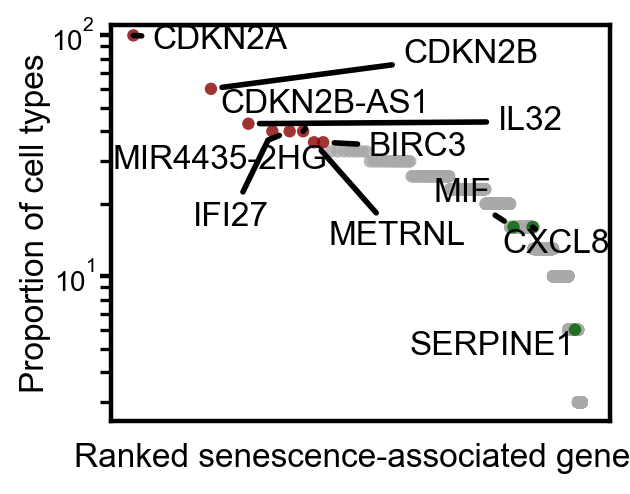

In [20]:
sc.settings.set_figure_params(dpi = 200, dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(1.6,1.3))
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
# plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=1.0, size = 2, labelsize = 5)
ax.grid(False)
sns.scatterplot(data = temp_reordered, x = "index", y = "celltype_prev", s=5, linewidth=0, edgecolor='black', 
                alpha = 0.8, rasterized=False, hue="label_binary", ax=ax, hue_order= ["Not labeled", "High prev", "Known SASP"],
               palette=["darkgrey", "darkred", "darkgreen"])
ax.get_legend().remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize = 5)
ax.set_xlabel("Ranked senescence-associated genes", labelpad=4.0)
ax.set_ylabel("Proportion of cell types", labelpad=0.0)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0,temp_reordered["index"].max() * 1.1)
ax.set_ylim(0,temp_reordered["celltype_prev"].max() * 1.1)

plt.axhline(y = 0.5, color = 'black', linewidth = 0.5, linestyle = '--') 

texts = []
for label_index in label_indices:
    texts.append(plt.text(temp_reordered["index"][label_index], 
                          temp_reordered["celltype_prev"][label_index],
                          temp_reordered["gene_label"][label_index]))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), min_arrow_len = 3, force_text = (1.0,1.0))

plt.savefig("human_figures/conserved_sc_markers_top20_new.pdf")

In [21]:
print(len(results_union))

3792


In [344]:
pd.DataFrame(results_union).to_csv("./../tabula_sapiens/TS_version2d_senescence_markers/3792.csv")

In [22]:
secretome = pd.read_csv("./../senescence_genesets/sa_location_Secreted.tsv", sep="\t")
# secretome = secretome[secretome["Secretome location"].isin(["Secreted in other tissues", "Secreted to extracellular matrix", "Secreted in brain"])]
secretome_genelist = secretome["Gene"].values

In [23]:
celltype_prevalence_secretome = celltype_prevalence.loc[np.intersect1d(celltype_prevalence.index.values, secretome["Gene"].values)]
celltype_prevalence_secretome = celltype_prevalence_secretome.sort_values(by= "celltype_prev", ascending=False)
celltype_prevalence_secretome["celltype_prev"] = celltype_prevalence_secretome["celltype_prev"].astype(int)
celltype_prevalence_secretome["celltype_prev"]

IL32        43
METRNL      36
LGALS3      33
C4orf48     33
CTSD        33
            ..
ISLR         3
CRLF1        3
OGN          3
GUCA2A       3
FAM177A1     0
Name: celltype_prev, Length: 224, dtype: int64

In [24]:
celltype_prevalence_secretome[0:10]

,celltype_prev
IL32,43
METRNL,36
LGALS3,33
C4orf48,33
CTSD,33
LCN2,30
ADGRF1,30
OAF,30
S100A13,26
TIMP2,26


In [71]:
temp = celltype_prevalence_secretome.reset_index(names=["gene"])
temp["index"] = np.log10(temp.index.values + 1) + 1 

temp["gene_label"] = np.NAN
temp["gene_label"][0:11] = temp["gene"][0:11]
temp["label_binary"] = "Not labeled"
temp["label_binary"][0:11] = "High prev"

genes_SASP = ["IL6", "IL1A", "IL1B", "IL7", "CXCL8", "CCL2", "SERPINE1", "MIF",  "MMP1"]
temp.loc[temp['gene'].isin(genes_SASP), 'gene_label'] = temp['gene']
temp.loc[temp['gene'].isin(genes_SASP), 'label_binary'] = "Known SASP"

# Split the DataFrame into two parts
temp_to_move = temp[temp['label_binary'] != "Not labeled"]
temp_remaining = temp[temp['label_binary'] == "Not labeled"]

# Concatenate the DataFrames to reorder
temp_reordered = pd.concat([temp_remaining, temp_to_move]).reset_index(drop=True)

label_indices = temp_reordered.index[temp_reordered['label_binary'] != "Not labeled"].tolist()

temp_reordered["label_binary"] = temp_reordered["label_binary"].astype("category")
temp_reordered["label_binary"] = temp_reordered["label_binary"].cat.reorder_categories(["Not labeled", "High prev", "Known SASP"])

/tmp/ipykernel_3089143/341598398.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp["gene_label"][0:11] = temp["gene"][0:11]
/tmp/ipykernel_3089143/341598398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

/tmp/ipykernel_3362064/2417594122.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,temp_reordered["index"].max() * 1.1)
/tmp/ipykernel_3362064/2417594122.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,temp_reordered["celltype_prev"].max() * 1.1)


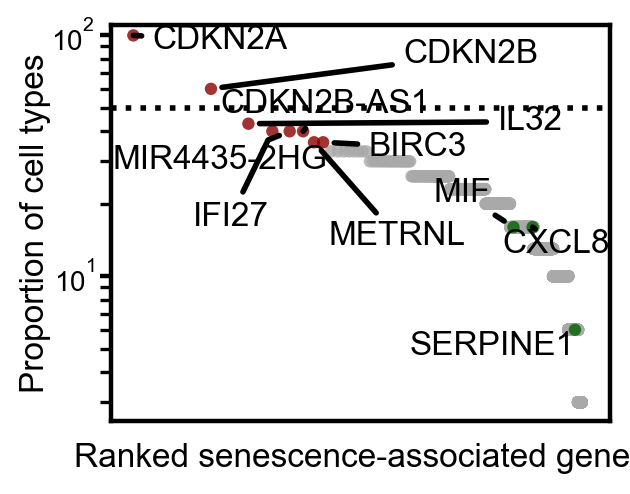

In [25]:
sc.settings.set_figure_params(dpi = 200, dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(1.6,1.3))
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
# plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=1.0, size = 2, labelsize = 5)
ax.grid(False)
sns.scatterplot(data = temp_reordered, x = "index", y = "celltype_prev", s=5, linewidth=0, edgecolor='black', 
                alpha = 0.8, rasterized=True, hue="label_binary", ax=ax, hue_order= ["Not labeled", "High prev", "Known SASP"],
               palette=["darkgrey", "darkred", "darkgreen"])
ax.get_legend().remove()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize = 5)
ax.set_xlabel("Ranked senescence-associated genes", labelpad=4.0)
ax.set_ylabel("Proportion of cell types", labelpad=0.0)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0,temp_reordered["index"].max() * 1.1)
ax.set_ylim(0,temp_reordered["celltype_prev"].max() * 1.1)

plt.axhline(y = 0.5, color = 'black', linewidth = 0.5, linestyle = '--') 

texts = []
for label_index in label_indices:
    texts.append(plt.text(temp_reordered["index"][label_index], 
                          temp_reordered["celltype_prev"][label_index],
                          temp_reordered["gene_label"][label_index]))

plt.axhline(y = 50, color = 'black', linestyle = ':', linewidth = 1) 

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), min_arrow_len = 3, force_text = (1.0,1.0))

plt.savefig("human_figures/conserved_sc_secretome_markers_top20_donorfrac00.pdf")

In [346]:
len(results_union)

3792

In [345]:
biotypes = pd.read_csv("./../transcripts_to_genes_with_biotypes.txt", sep= "\t")[["gene_name", "gene_biotype"]].drop_duplicates().set_index("gene_name")
biotype_table = pd.DataFrame(biotypes.loc[np.intersect1d(results_union, biotypes.index.values)].value_counts()).to_dict(orient="index")
biotype_table

{('protein_coding',): {'count': 3642},
 ('lncRNA',): {'count': 126},
 ('transcribed_unprocessed_pseudogene',): {'count': 15},
 ('transcribed_unitary_pseudogene',): {'count': 3},
 ('transcribed_processed_pseudogene',): {'count': 2},
 ('IG_C_gene',): {'count': 1},
 ('processed_pseudogene',): {'count': 1},
 ('unprocessed_pseudogene',): {'count': 1}}

In [26]:
enr_res = gseapy.enrichr(gene_list=list(celltype_prevalence.index.values),
     organism='Human',
     gene_sets=['GO_Biological_Process_2023'],
     cutoff = 0.01)

In [27]:
# --------------------------- configuration ---------------------------
n_top_pathways = 15                                          # unchanged

# --------------------------- ranking ---------------------------
df = enr_res.results.copy()
df = df[df["Adjusted P-value"] < 0.01]

df["OverlapNumber"] = (
    df["Overlap"].str.split("/", expand=True)[0].astype(int)
    / df["Overlap"].str.split("/", expand=True)[1].astype(int)
)
df = (
    df.sort_values(by=["Adjusted P-value", "OverlapNumber"],
                   ascending=[True, False])
      .reset_index(drop=True)
)

# --------------------------- selection ---------------------------
rows, captured_genes, kept = [], set(), 0

for _, row in df.iterrows():
    if int(row["Overlap"].split("/")[0]) < 5:
        continue

    pathway_genes = set(row["Genes"].split(";"))

    if captured_genes and (
        len(pathway_genes & captured_genes) / len(pathway_genes) > 0.25
    ):
        continue

    # CHANGED: removed dependency on external `columns` variable
    rows.append({
        "Pathway": row["Term"].split(" (GO:")[0],
        "Overlap": row["Overlap"],
        "Adjusted_P-value": row["Adjusted P-value"],
        "Genes": row["Genes"],
    })

    captured_genes.update(pathway_genes)
    kept += 1
    if kept == n_top_pathways:
        break

# --------------------------- output ---------------------------
pathway_df = pd.DataFrame(rows)
pathway_df["-log adjusted p-value"] =  -1 * np.log10(pathway_df["Adjusted_P-value"]) 
pathway_df.Pathway = pathway_df.Pathway.str.capitalize()
print("Done")

Done


/tmp/ipykernel_3362064/3616787077.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, horizontalalignment='right')
/tmp/ipykernel_3362064/3616787077.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


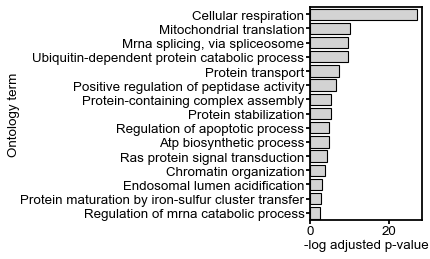

In [28]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(0.9,1.75))
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
# plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0.5, size = 2, labelsize = 6)
ax.grid(False)
g = sns.barplot(y = "Pathway", x = "-log adjusted p-value", data= pathway_df, color = "black", fill = True, linewidth=0.5, facecolor="lightgrey",
                  edgecolor="black", ax=ax)
from textwrap import wrap
labels = [x.get_text() for x in ax.get_yticklabels()]
labels = ['\n'.join(wrap(l, 100)) for l in labels]
# print(labels)
ax.set_yticklabels(labels, rotation=0, horizontalalignment='right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("-log adjusted p-value", labelpad=0.5)
ax.set_ylabel("Ontology term", labelpad=0.0)
# ax.set_xlim(0,1.02*np.max(GO_results["-log p-value"]))
plt.savefig("human_figures/conserved_sc_markers_go_analysis_new.pdf")

In [288]:
genes_SASP = ["IL6", "IL1A", "IL1B", "IL7", "CXCL8", "CCL2", "SERPINE1", "MIF", "MMP1"]

In [297]:
# genelist = list(pd.DataFrame.from_dict(celltype, orient="index").index.values[0:10])
genelist = list(celltype_prevalence.index.values[0:10]) 
# genes_SASP = [x for x in genes_SASP if x in celltype_prevalence.index.values]
genes_SASP = [x for x in genes_SASP]
print(genelist)
print(genes_SASP)

['CDKN2A', 'CDKN2B', 'IL32', 'MIR4435-2HG', 'CDKN2B-AS1', 'IFI27', 'METRNL', 'BIRC3', 'DUSP5', 'TIAM1']
['IL6', 'IL1A', 'IL1B', 'IL7', 'CXCL8', 'CCL2', 'SERPINE1', 'MIF', 'MMP1']


In [298]:
lfc_all_genes = pd.read_csv("./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_posneg_by_broadcelltype_minlfc0.0_pval0.01_minpct0.0.csv", index_col=0)
# lfc_all_genes = lfc_all_genes[results_union]
# lfc_all_genes["broad_cell_class"] = lfc_all_genes.index.to_series().astype(str).str.split("__", expand=True)[1]
# lfc_all_genes = lfc_all_genes.groupby("broad_cell_class").mean()
print(lfc_all_genes.shape)
lfc_all_genes.head()

(30, 18213)


,CDKN2A,TNNT3,CYP4B1,IGFBP2,IL32,CA4,H19,LPL,CLDN5,GYPC,...,ENSG00000271758,ATP1A4,UGT1A6,HOXA5,ZNF321P,RANBP3-DT,PLIN4,ANXA10,PTPRQ,ENSG00000253300
donor_tissue_broadcelltype,,,,,,,,,,,,,,,,,,,,,
adventitial cell,10.621028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cardiac endothelial cell,30.872623,0.872408,0.860012,0.830675,0.819023,0.811154,0.79969,0.79594,0.769765,0.65644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciliated epithelial cell,8.781799,NaN,-0.583893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conjunctival epithelial cell,11.250185,0.766611,NaN,NaN,NaN,NaN,0.97866,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connective tissue cell,30.769537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
from scipy import stats
df_heatmap = lfc_all_genes[genelist].T
df_heatmap.columns = df_heatmap.columns.str.capitalize()
df_heatmap

donor_tissue_broadcelltype,Adventitial cell,Cardiac endothelial cell,Ciliated epithelial cell,Conjunctival epithelial cell,Connective tissue cell,Contractile cell,Duct epithelial cell,Ecto-epithelial cell,Endo-epithelial cell,Endothelial cell,...,Intestinal epithelial cell,Lymphocyte of b lineage,Meso-epithelial cell,Myeloid leukocyte,Secretory cell,Stem cell,Stratified epithelial cell,Stromal cell,T cell,Transitional epithelial cell
CDKN2A,10.621028,30.872623,8.781799,11.250185,30.769537,10.780946,10.771090,10.686704,9.534681,14.542121,...,11.101451,5.898397,5.56916,9.113577,11.674494,11.485150,6.614908,14.491556,9.566457,7.947049
CDKN2B,NaN,NaN,1.354453,1.567064,NaN,2.555842,2.209702,1.353735,3.199658,3.169340,...,0.744999,0.972164,NaN,1.183362,NaN,1.084012,0.504281,NaN,2.085396,0.936714
IL32,NaN,0.819023,NaN,NaN,NaN,1.304659,0.975235,NaN,2.783249,1.664390,...,1.319842,0.957352,NaN,0.659796,NaN,0.946473,NaN,2.033219,0.728793,NaN
MIR4435-2HG,NaN,NaN,0.758121,0.218091,NaN,NaN,0.441897,0.592189,2.032299,NaN,...,0.560024,0.631299,NaN,0.198238,NaN,0.480791,0.543981,1.568603,0.951128,0.092804
CDKN2B-AS1,NaN,NaN,0.769076,1.167014,NaN,2.997741,2.229774,NaN,NaN,NaN,...,1.812159,0.451405,NaN,1.329000,NaN,NaN,0.777802,NaN,1.361001,1.120773
IFI27,NaN,NaN,0.956699,1.339773,NaN,0.388322,2.418862,0.656935,2.075755,0.477341,...,0.445720,NaN,NaN,1.230937,NaN,0.916770,0.652559,0.876184,NaN,NaN
METRNL,NaN,NaN,NaN,0.806556,NaN,0.222471,0.640835,0.586244,1.402194,NaN,...,0.521852,0.108599,NaN,-0.384580,NaN,NaN,0.356445,NaN,0.667972,0.063718
BIRC3,NaN,NaN,0.561414,0.513307,NaN,0.082539,0.156909,0.522218,1.617090,NaN,...,1.243241,NaN,NaN,NaN,NaN,0.744869,NaN,NaN,NaN,0.526931
DUSP5,NaN,NaN,1.021925,1.128973,NaN,1.010960,0.618729,0.849704,2.130549,NaN,...,1.335747,0.746861,NaN,NaN,NaN,NaN,0.275260,0.479865,0.389653,0.108780
TIAM1,NaN,NaN,0.847136,0.625817,NaN,0.759463,-1.156195,0.367590,2.789386,NaN,...,NaN,0.963578,NaN,0.117585,NaN,NaN,0.267910,2.147069,-0.484271,0.306672


In [300]:
gene_metadata = pd.DataFrame.from_dict({"gene" : genelist})
# gene_metadata["source"] = "SASP"
gene_metadata.loc[gene_metadata["gene"].isin(genelist), "source"] = "TS - most prevalent"
# gene_metadata.loc[gene_metadata["gene"].isin(["CDKN2A"]), "source"] = "CDKN2A"
gene_metadata = gene_metadata.set_index("gene")
gene_metadata

,source
gene,
CDKN2A,TS - most prevalent
CDKN2B,TS - most prevalent
IL32,TS - most prevalent
MIR4435-2HG,TS - most prevalent
CDKN2B-AS1,TS - most prevalent
IFI27,TS - most prevalent
METRNL,TS - most prevalent
BIRC3,TS - most prevalent
DUSP5,TS - most prevalent


In [301]:
metadata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_senescent_cells_by_donor_tissue_broadcelltype.h5ad").obs
extradata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)
extradata = extradata[["broad_cell_class", "compartment"]].reset_index(drop=True).drop_duplicates()
extradata["broad_cell_class"] = extradata["broad_cell_class"].str.capitalize()
df = extradata.set_index("broad_cell_class")
df = df.loc[df_heatmap.columns.values,:]
df = df[~df.index.duplicated(keep="first")]
print(df.shape)
df.head()

/tmp/ipykernel_3401930/2369775543.py:2: DtypeWarning: Columns (5,6,7,8,9,13,14,15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  extradata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)


(30, 1)


,compartment
broad_cell_class,
Adventitial cell,Stromal
Cardiac endothelial cell,Endothelium
Ciliated epithelial cell,Epithelium
Conjunctival epithelial cell,Epithelium
Connective tissue cell,Stromal


In [302]:
gene_metadata["source"] = gene_metadata["source"].astype("category")

In [303]:
# complartment_colors = {'Immune': '#1f77b4',
#  'Epithelium': '#ff7f0e',
#  'Stromal': '#279e68',
#  'Endothelium': '#d62728',
#  'Neural': '#aa40fc'}

/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/PyComplexHeatmap/clustermap.py:1699: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  row_clusters = self.row_split.groupby(cols).apply(


Starting plotting HeatmapAnnotations


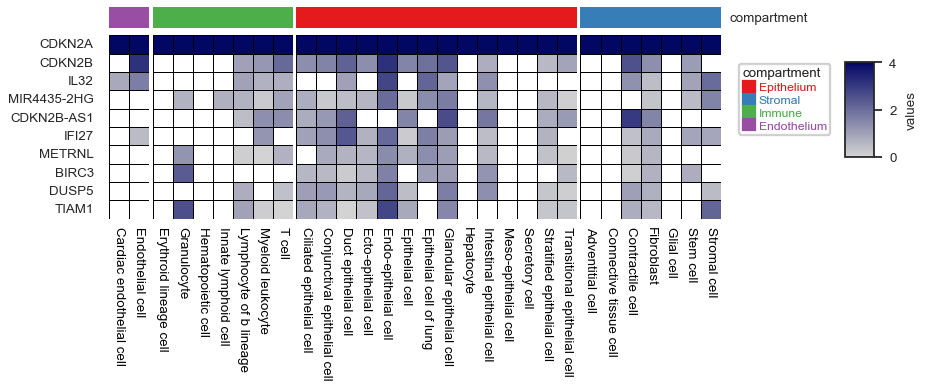

In [304]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
plt.figure(figsize=(5.0,1.5))
sns.set_style("ticks")

# Define custom colormap with grey for NA values
cmap = sns.blend_palette(["lightgrey", sns.xkcd_rgb["darkblue"]], as_cmap=True)
cmap.set_bad(color='black')
cmap.set_under(color='black')

col_ha = pch.HeatmapAnnotation(#label=pch.anno_label(df.compartment, merge=True,rotation=90),
                            compartment=pch.anno_simple(df.compartment,add_text=False,legend=True), axis=1,
                           legend=True,legend_gap=5,hgap=0.5)

cm = pch.ClusterMapPlotter(data=np.clip(df_heatmap, a_min=0, a_max=4), top_annotation=col_ha,
                       col_cluster=False,row_cluster=False,
                       col_split=df.compartment, row_split=gene_metadata.source,
                       col_split_gap=0.5, row_split_gap=1.0,
                       label='values',row_dendrogram=False,
                       show_rownames=True,show_colnames=True, col_names_side='bottom',
                       row_names_side='left',
                       tree_kws={'col_cmap': 'Set1'}, verbose=0,legend_gap=10, linewidths=0.3, linecolor='black', 
                       # cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["darkblue"]], as_cmap=True),
                       cmap = cmap, 
                       xticklabels_kws= {'labelrotation': -90, 'labelcolor':'black', 'pad': 0})

plt.savefig("human_figures/sag_lfc_heatmap_new.pdf", bbox_inches='tight')
# plt.show()

In [30]:
lfc_all_genes = pd.read_csv("./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_lfc_posneg_by_broadcelltype_minlfc0.0_pval0.05_minpct0.0.csv", index_col=0)
# lfc_all_genes = lfc_all_genes[results_union]
# lfc_all_genes["broad_cell_class"] = lfc_all_genes.index.to_series().astype(str).str.split("__", expand=True)[1]
# lfc_all_genes = lfc_all_genes.groupby("broad_cell_class").mean()
print(lfc_all_genes.shape)
lfc_all_genes.head()

(31, 19321)


,CDKN2A,TNNT3,CYP4B1,IGFBP2,IL32,CA4,H19,LPL,FABP4,CLDN5,...,UGT1A6,ENSG00000286951,ENSG00000242317,ZNF321P,RANBP3-DT,ENSG00000261191,PLIN4,HOXA3,ANXA10,ENSG00000253300
broadcelltype,,,,,,,,,,,,,,,,,,,,,
adventitial cell,10.621028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cardiac endothelial cell,30.872623,0.872408,0.860012,0.830675,0.819023,0.811154,0.79969,0.79594,0.774168,0.769765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciliated epithelial cell,8.781799,NaN,-0.583893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conjunctival epithelial cell,11.250185,0.766611,NaN,NaN,NaN,NaN,0.97866,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connective tissue cell,30.769537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
genes_SASP = ["IL6", "IL1A", "IL1B", "IL7", "CXCL8", "CCL2", "SERPINE1", "MIF", "MMP1"]
list1 = ["CDKN2A", "CDKN1A"]
list2 = ["IL6", "IL1A", "IL1B", "SERPINE1"]
list2 = genes_SASP
list3 = ["HMGB1", "LMNB1"]
list4 = ["BCL2", "BCL2L1", "BCL2L2", "MCL1"]
# list4 = ["BCL2", "BCL2L1", "BCL2L2", "MCL1", "BCL2A1"]

In [32]:
genes_heatmap = list1 + list2 + list3 + list4

In [33]:
genelist = list(celltype_prevalence.index.values[0:14]) 
genes_heatmap = [x for x in genes_heatmap if x in lfc_all_genes.columns]
print(genelist)
print(genes_heatmap)

['CDKN2A', 'CDKN2B', 'IL32', 'CDKN2B-AS1', 'BIRC3', 'IFI27', 'MIR4435-2HG', 'METRNL', 'C4orf48', 'ALDH1A3', 'LGALS3', 'CTSD', 'GPRC5A', 'FDXR']
['CDKN2A', 'CDKN1A', 'IL6', 'IL1A', 'IL1B', 'IL7', 'CXCL8', 'CCL2', 'SERPINE1', 'MIF', 'MMP1', 'HMGB1', 'LMNB1', 'BCL2', 'BCL2L1', 'BCL2L2', 'MCL1']


In [34]:
from scipy import stats
df_heatmap = lfc_all_genes[genes_heatmap].T
df_heatmap.columns = df_heatmap.columns.str.capitalize()

In [35]:
gene_metadata = pd.DataFrame.from_dict({"gene" : genes_heatmap})
gene_metadata.loc[gene_metadata["gene"].isin(list1), "source"] = "Cell cycle inhibition"
gene_metadata.loc[gene_metadata["gene"].isin(list2), "source"] = "SASP"
gene_metadata.loc[gene_metadata["gene"].isin(list3), "source"] = "Nuclear reorganization"
gene_metadata.loc[gene_metadata["gene"].isin(list4), "source"] = "Anti-apoptotic pathway"
gene_metadata = gene_metadata.set_index("gene")
gene_metadata

,source
gene,
CDKN2A,Cell cycle inhibition
CDKN1A,Cell cycle inhibition
IL6,SASP
IL1A,SASP
IL1B,SASP
IL7,SASP
CXCL8,SASP
CCL2,SASP
SERPINE1,SASP


In [36]:
gene_metadata["source"] = gene_metadata["source"].astype("category")

In [37]:
metadata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_senescent_cells_by_donor_tissue_broadcelltype.h5ad").obs
extradata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)
extradata = extradata[["broad_cell_class", "compartment"]].reset_index(drop=True).drop_duplicates()
extradata["broad_cell_class"] = extradata["broad_cell_class"].str.capitalize()
df = extradata.set_index("broad_cell_class")
df = df.loc[df_heatmap.columns.values,:]
df = df[~df.index.duplicated(keep="first")]
print(df.shape)
df.head()

/tmp/ipykernel_3077099/2369775543.py:2: DtypeWarning: Columns (5,6,7,8,9,13,14,15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  extradata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)


(31, 1)


,compartment
broad_cell_class,
Adventitial cell,Stromal
Cardiac endothelial cell,Endothelium
Ciliated epithelial cell,Epithelium
Conjunctival epithelial cell,Epithelium
Connective tissue cell,Stromal


/hpc/mydata/madhav.mantri/conda_envs/python3.9/lib/python3.9/site-packages/PyComplexHeatmap/clustermap.py:1699: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  row_clusters = self.row_split.groupby(cols).apply(


Starting plotting HeatmapAnnotations


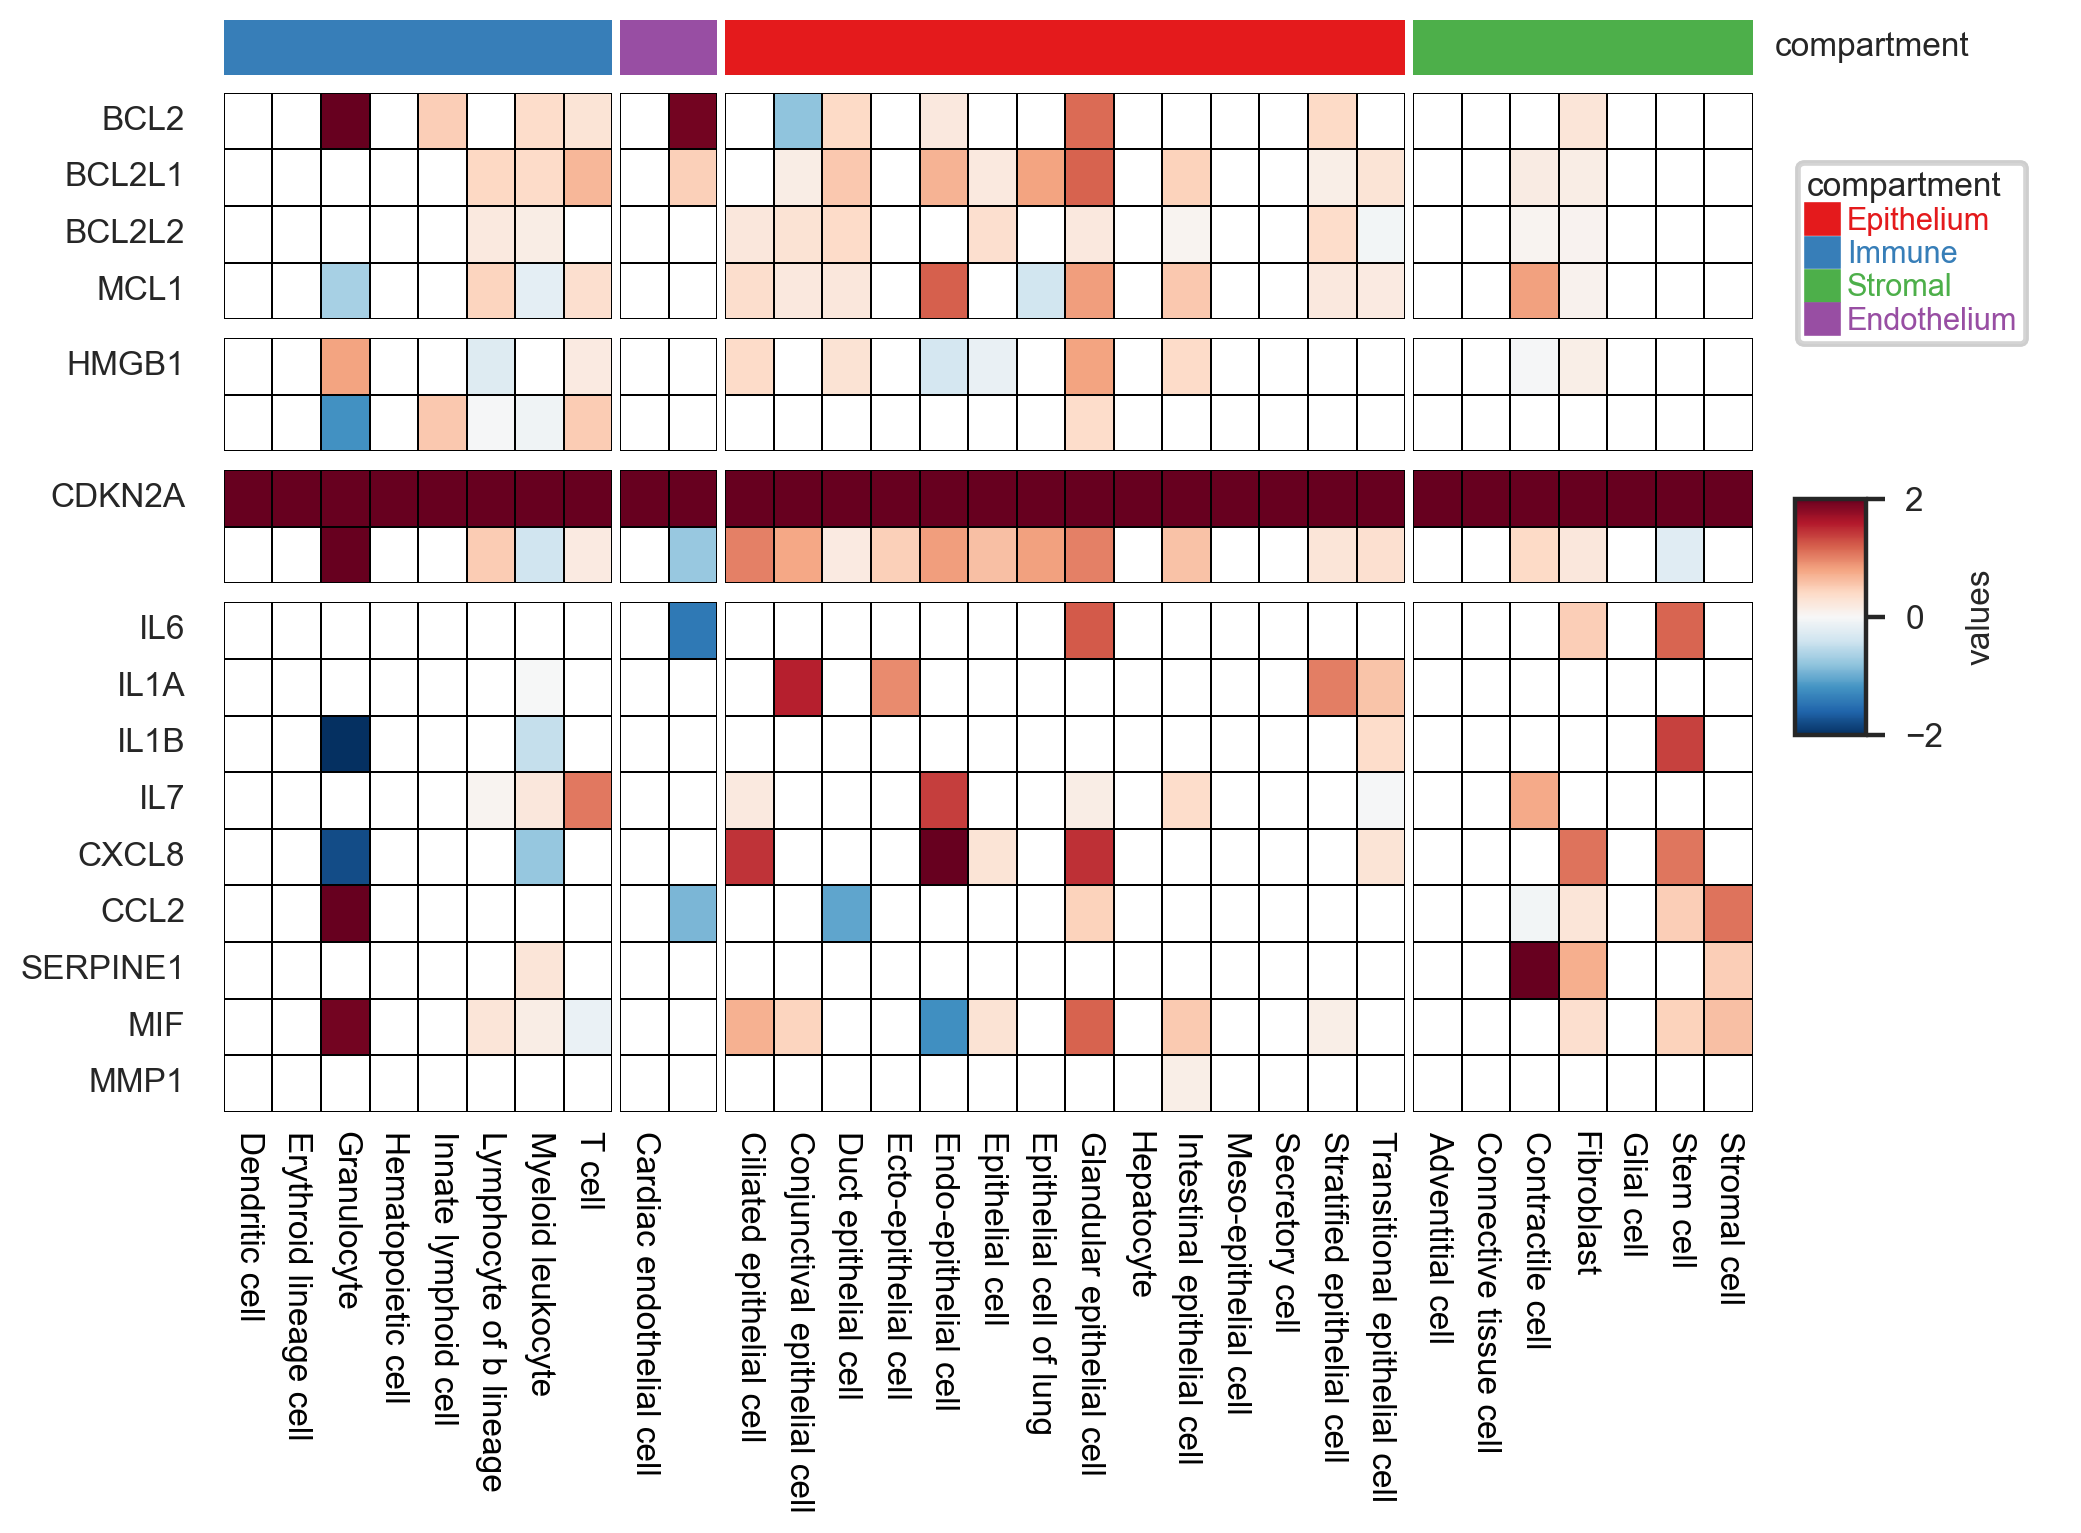

In [38]:
sc.settings.set_figure_params(dpi = 200, dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
plt.figure(figsize=(5.0,3.05))
sns.set_style("ticks")

cmap = sns.blend_palette(["lightgrey", sns.xkcd_rgb["darkblue"]], as_cmap=True)
cmap.set_bad(color='black')
cmap.set_under(color='black')

col_ha = pch.HeatmapAnnotation(#label=pch.anno_label(df.compartment, merge=True,rotation=90),
                            compartment=pch.anno_simple(df.compartment,add_text=False,legend=True), axis=1,
                           legend=True,legend_gap=5,hgap=0.5)

cm = pch.ClusterMapPlotter(data=np.clip(df_heatmap, a_min=-2, a_max=2), top_annotation=col_ha,
                       col_cluster=False,row_cluster=False,
                       col_split=df.compartment, row_split=gene_metadata.source,
                       col_split_gap=0.5, row_split_gap=1.0,
                       label='values',row_dendrogram=False,
                       show_rownames=True,show_colnames=True, col_names_side='bottom',
                       row_names_side='left', 
                       tree_kws={'col_cmap': 'Set1'}, verbose=0,legend_gap=10, linewidths=0.3, linecolor='black', 
                       # cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["darkblue"]], as_cmap=True),
                       cmap = "RdBu_r", 
                       xticklabels_kws= {'labelrotation': -90, 'labelcolor':'black', 'pad': 0})

plt.savefig("human_figures/hallmarks_lfc_heatmap.pdf", bbox_inches='tight')
# plt.show()

In [61]:
import pickle
with open('./../tabula_sapiens/TS_version2d_senescence_markers/6_HUMAN_SIGS_DICTIONARY_FILTERED.pickle', 'rb') as handle:
    marker_dict = pickle.load(handle)
handle.close()

In [62]:
for cell_type, genes in marker_dict.items():
    print(f"{cell_type}: {len(genes)}, {genes[:5]}...") 

('blood', 'memory b cell'): 1127, [('H3F3C', 26), ('PABPC3', 20), ('FGF13', 5), ('NBPF26', 28), ('MTRNR2L12', 24)]...
('blood', 'monocyte'): 127, [('SLC8A1-AS1', 4), ('NBPF15', 5), ('NEB', 2), ('RMRP', 2), ('SCARNA9', 4)]...
('blood', 'naive b cell'): 295, [('MPP1', 63), ('SCRN1', 7), ('ARHGAP21', 78), ('THBS1', 45), ('F2R', 80)]...
('blood', 'neutrophil'): 1441, [('ZGRF1', 166), ('NCAPD3', 116), ('CTPS1', 255), ('CEP290', 154), ('TTK', 237)]...
('blood', 'nk cell'): 292, [('TFF3', 51), ('C19orf38', 201), ('MBOAT2', 121), ('DAAM2', 155), ('RRP12', 31)]...
('blood', 't cell'): 411, [('H3F3C', 10), ('UQCRHL', 8), ('PABPC3', 9), ('MTRNR2L1', 9), ('HNRNPA1L2', 8)]...
('bone marrow', 't cell'): 857, [('RRAS2', 6), ('SPRY2', 14), ('CCL3', 9), ('PDLIM1', 5), ('KLRC3', 13)]...
('heart', 'adipocyte'): 32, [('ANK1', 9), ('MAPK4', 8), ('LINC00881', 14), ('MYH7B', 19), ('PPP1R1C', 14)]...
('heart', 'cardiomyocyte'): 90, [('METTL7B', 23), ('MCOLN3', 31), ('CLSTN2', 19), ('ACTA2', 50), ('EPHA5-AS1',

In [42]:
df1 = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_nonsenescent_cells_by_tissue_broadcelltype.h5ad").to_df()
df2 = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_senescent_cells_by_tissue_broadcelltype.h5ad").to_df()
lfc_all_genes = np.log2(np.expm1(df2.loc[np.intersect1d(df1.index, df2.index)]).add(1e-9).div(np.expm1(df1.loc[np.intersect1d(df1.index, df2.index)]).add(1e-9)))

lfc_all_genes = lfc_all_genes[all_sags]
lfc_all_genes = lfc_all_genes[lfc_all_genes > 0.0]
print(lfc_all_genes.shape)

(257, 3792)


In [210]:
lfc_all_genes = pd.read_csv("./../tabula_sapiens/TS_version2d_senescence_markers/Cdkn2a_pos_Mki67_neg_marker_list_with_z_posneg_by_tissue_broadcelltype_minlfc0.0_pval0.01_minpct0.0.csv", index_col=0)
lfc_all_genes = lfc_all_genes[lfc_all_genes > 0.0]
lfc_all_genes = lfc_all_genes[results_union]
lfc_all_genes.head()

,CDKN2A,CDKN2B,TMSB4X,RAB11FIP1,ITM2C,IL32,LMO7,CST3,GLRX,MACC1,...,FGFBP1,PMAIP1,PTGS2,RGS20,CNGA1,C4orf19,CTSV,OLFML3,SPARC,THBS1
tissue_broadcelltype,,,,,,,,,,,,,,,,,,,,,
Bladder__contractile cell,30.766357,1.872929,0.592022,NaN,1.131431,0.616337,NaN,NaN,NaN,NaN,...,NaN,NaN,0.915264,NaN,NaN,NaN,NaN,1.363139,0.808109,NaN
Bladder__fibroblast,14.593578,1.402438,NaN,1.333321,0.422720,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.453077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bladder__granulocyte,30.852274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bladder__lymphocyte of b lineage,7.872964,NaN,NaN,NaN,0.495708,NaN,NaN,NaN,0.685427,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bladder__myeloid leukocyte,9.129157,NaN,NaN,0.553490,NaN,2.054560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
lfc_all_genes["broad_cell_class"] = lfc_all_genes.index.to_series().astype(str).str.split("__", expand=True)[1]
lfc_all_genes = lfc_all_genes.groupby("broad_cell_class").mean()
print(lfc_all_genes.shape)

(30, 3792)


In [218]:
gene_dict = {cell_type: list(lfc_all_genes.loc[cell_type][lfc_all_genes.loc[cell_type] > 0.0].sort_values(ascending=False).items()) for cell_type in lfc_all_genes.index}
for cell_type, genes in gene_dict.items():
    print(f"{cell_type}: {len(genes)}, {genes[:5]}...") 

adventitial cell: 1, [('CDKN2A', 28.94998550415039)]...
cardiac endothelial cell: 10, [('CDKN2A', 30.87262344360352), ('TNNT3', 0.8724081516265869), ('IGFBP2', 0.8306753039360046), ('IL32', 0.8190227150917053), ('H19', 0.7996900677680969)]...
ciliated epithelial cell: 2182, [('CDKN2A', 8.795544465382894), ('STK16', 1.664945363998413), ('STMN1', 1.5901470184326172), ('MOB2', 1.3889929056167605), ('MMUT', 1.384963035583496)]...
conjunctival epithelial cell: 2108, [('CDKN2A', 11.250185012817385), ('SLURP1', 2.18308424949646), ('MUC21', 1.788159966468811), ('APOBEC3A', 1.7343144416809082), ('IL1RN', 1.664128661155701)]...
connective tissue cell: 1, [('CDKN2A', 30.7695369720459)]...
contractile cell: 2353, [('CDKN2A', 24.30524950027466), ('CLDN4', 4.311517238616943), ('CDH1', 3.948054313659668), ('RAB25', 3.753772258758545), ('ST14', 3.682260751724243)]...
duct epithelial cell: 3211, [('CDKN2A', 10.366002082824707), ('KLK6', 2.5981595516204834), ('IGFBP5', 2.5771901607513428), ('CEACAM6', 2

In [221]:
gene_dict = {cell_type: ", ".join(lfc_all_genes.loc[cell_type][lfc_all_genes.loc[cell_type] > 0.0].sort_values(ascending=False).index.tolist()) for cell_type in lfc_all_genes.index}
# pd.DataFrame.from_dict(gene_dict, orient="index", columns=["Senescence-associated genes"]).reset_index(names=["Cell type"]).to_csv("./../tabula_sapiens/TS_version2d_senescence_markers/TS_senescence_genes_by_celltypes_new.tsv", sep="\t")

In [47]:
marker_dict_grouped_by_celltypes_conserved_across_donors_to_save = dict() 
for key, value in marker_dict_grouped_by_celltypes_conserved_across_donors.items():
    marker_dict_grouped_by_celltypes_conserved_across_donors_to_save[key]  = str(value)[1:-1]
pd.DataFrame.from_dict(marker_dict_grouped_by_celltypes_conserved_across_donors_to_save, orient="index", columns=["SAGs"])#.to_csv("./../tabula_sapiens/TS_version2d_senescence_markers/TS_senescence_genes_by_celltypes.tsv", sep="\t")

,SAGs
lymphocyte of b lineage,"'NEAT1', 'TMED2', 'ANKRD28', 'BCL2L11', 'SPATS..."
myeloid leukocyte,"'ARL4C', 'HTRA1', 'UST', 'STIM1', 'TCF7L2', 'S..."
t cell,"'LYST', 'RABGAP1L', 'NKG7', 'NIBAN1', 'IL32', ..."
fibroblast,"'CDKN2A', 'ZMAT3'"
innate lymphoid cell,'CDKN2A'
cardiac endothelial cell,'CDKN2A'
contractile cell,"'MIR100HG', 'SPTBN1', 'TMEM204', 'TNFRSF11B', ..."
transitional epithelial cell,"'CDKN2A', 'CDKN2B'"
granulocyte,'CDKN2A'
glial cell,'CDKN2A'


In [170]:
marker_dict_grouped_by_celltypes = dict()
for donor_tissue_celltype in marker_dict_grouped_by_tissue_celltypes.keys():
    id = donor_tissue_celltype.split("__")[1] # + "__" + donor_tissue_celltype.split("__")[2]
    if len(marker_dict_grouped_by_tissue_celltypes[donor_tissue_celltype]) > 0:
        if id not in marker_dict_grouped_by_celltypes.keys():
            marker_dict_grouped_by_celltypes[id] = list()
        marker_dict_grouped_by_celltypes[id].append(list(marker_dict_grouped_by_tissue_celltypes[donor_tissue_celltype]))
        
print(marker_dict_grouped_by_celltypes.keys())

dict_keys(['lymphocyte of b lineage', 'myeloid leukocyte', 't cell', 'fibroblast', 'innate lymphoid cell', 'cardiac endothelial cell', 'contractile cell', 'transitional epithelial cell', 'granulocyte', 'glial cell', 'intestinal epithelial cell', 'hepatocyte', 'ciliated epithelial cell', 'endothelial cell', 'epithelial cell of lung', 'stem cell', 'endo-epithelial cell', 'duct epithelial cell', 'epithelial cell', 'glandular epithelial cell', 'stratified epithelial cell', 'conjunctival epithelial cell', 'ecto-epithelial cell', 'meso-epithelial cell', 'stromal cell', 'adventitial cell', 'connective tissue cell', 'secretory cell'])


In [171]:
from collections import Counter
all_genes = [gene for genes in marker_dict_grouped_by_celltypes[celltype_of_interest] for gene in genes]
gene_frequency = Counter(all_genes)
sorted_gene_frequency = dict(sorted(gene_frequency.items(), key=lambda x:x[1], reverse = True))
max_freq = np.max(list(sorted_gene_frequency.values()))
sorted_gene_props = {k: (v / max_freq)*100 for k, v in sorted_gene_frequency.items()}

results_union = [x for x in sorted_gene_frequency.keys() if sorted_gene_frequency[x] >= 0.0]
print(len(results_union))

909
